# Intermediate Assignment

## Business Background

We are an Indonesian investment platform startup which currently focused on app-based mutual fund investment at the end of September 2022.

Currently there are 4 types of mutual funds:
- stocks mutual funds
- bond mutual funds
- money market mutual funds
- mixed-investment mutual funds .

As the Company is expanding into government bond investment products, marketing and sales team would like to run a thematic communication campaign for the upcoming product but want to tailor the campaign to a few different relevant segments.





Objective :

- EDA
- Do cluster analysis
- Give recomendation about new product (Government Bond)

#A) Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from datetime import datetime
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

### Users dataset

In [ ]:
#Import dataset from spreadsheet
user_url = 'https://docs.google.com/spreadsheets/d/17n053_7FjEEhL3G8I7DITSFeIfcjgBa0fRr53x-SR2g/edit#gid=0'
user_url_replace = user_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert the spreadsheet format into csv

#Load Users Dataset URL
print(user_url_replace) #To show the link to csv
user = pd.read_csv(user_url_replace) #to load/read the csv into pandas dataframe

#Show only first 5 rows
user.head()

https://docs.google.com/spreadsheets/d/17n053_7FjEEhL3G8I7DITSFeIfcjgBa0fRr53x-SR2g/export?format=csv&gid=0


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


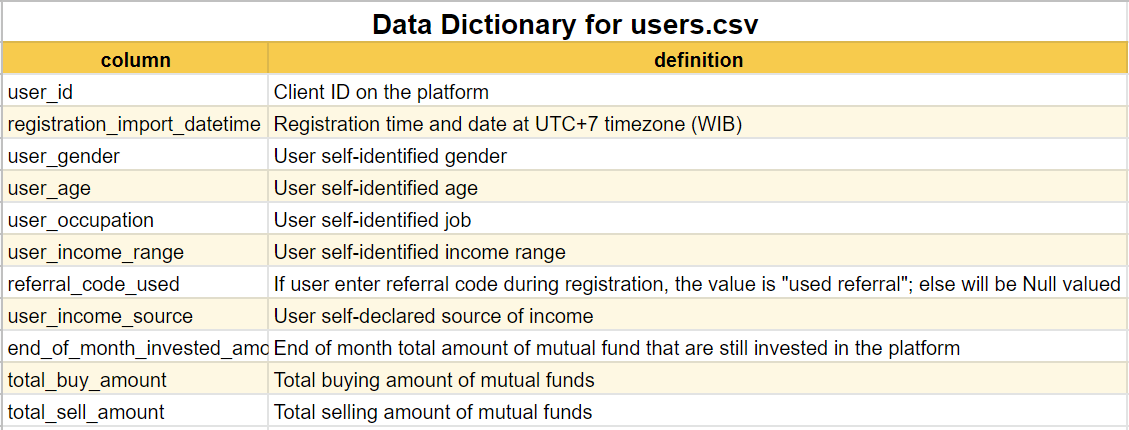

### Daily User Transaction dataset

In [ ]:
#Import dataset from spreadsheet
user_url = 'https://docs.google.com/spreadsheets/d/1b3DAli5xsR39nNL06IGvzhbEdOJkcvxpLKvhWUf9tYc/edit#gid=0'
user_url_replace = user_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert the spreadsheet format into csv

#Load Users Dataset URL
print(user_url_replace) #To show the link to csv
transaction = pd.read_csv(user_url_replace) #to load/read the csv into pandas dataframe

#Show only first 5 rows
transaction.head(5)

https://docs.google.com/spreadsheets/d/1b3DAli5xsR39nNL06IGvzhbEdOJkcvxpLKvhWUf9tYc/export?format=csv&gid=0


,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0,0,NaN,NaN,NaN,10000000.00,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0,0,NaN,NaN,NaN,10000000.00,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0,0,NaN,NaN,NaN,10000000.00,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0,0,NaN,NaN,NaN,10000000.00,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0,0,NaN,NaN,NaN,10000000.00,10000000


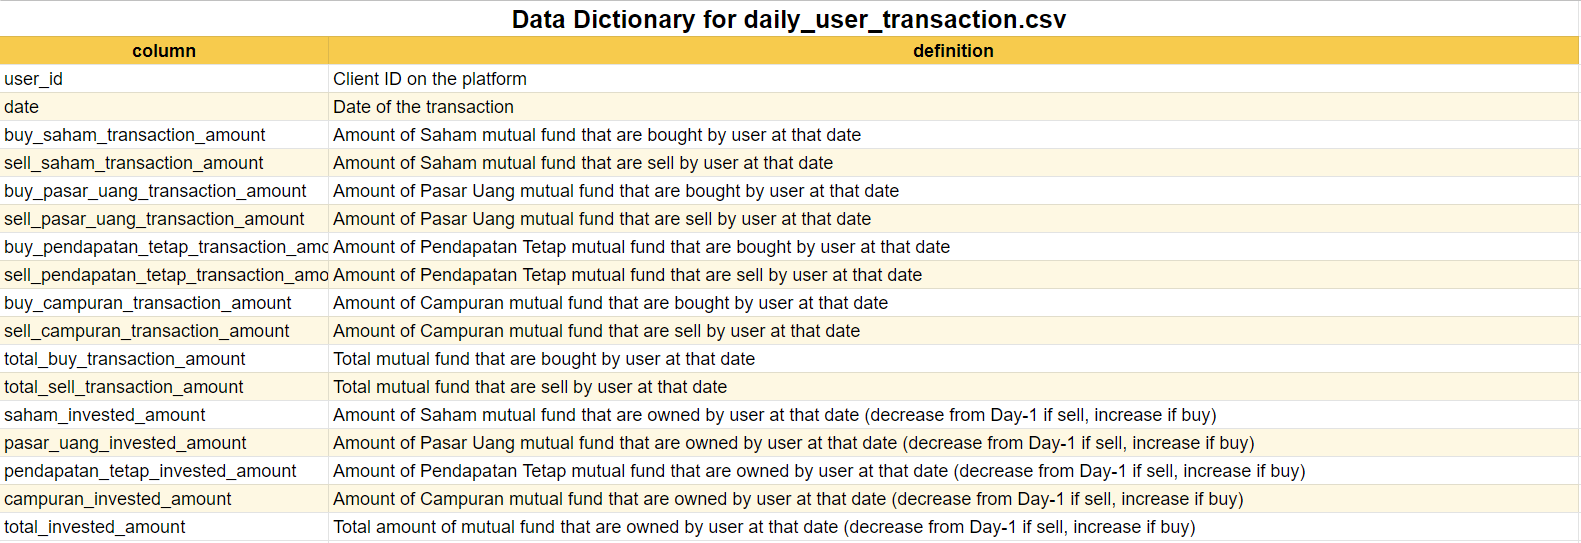

#B) Data Cleaning

Steps to do :

- Unique Values (Remove irrelevant values)
- Treating missing values (state the reasoning)
- Outliers (in loan_amount & annual_income using IQR)
- Check Duplicates, retain only the first record
- Check data & convert data types
- Check typos
- Check time series data
- Merge the dataset

### Users

####Check Data  

detect the imbalance data to discover the anomali data. ex, referral data consist of 90% used and 10% used so we can drop this data because its imbalance.

but, in this case  theres no imbalance data

In [ ]:
for i in user.columns:
  unique_data = user[i].value_counts()
  print(unique_data,'\n')

  #this formula can be used to check typo in each columns

user_id
4401986    1
162882     1
3485491    1
1071649    1
3816789    1
          ..
3770075    1
3820160    1
3820348    1
3718933    1
3783302    1
Name: count, Length: 14712, dtype: int64 

registration_import_datetime
2021-09-17 16:41:06    5
2021-10-01 16:49:54    5
2021-08-10 10:55:26    5
2021-09-01 19:28:19    5
2021-09-05 15:12:38    5
                      ..
2021-09-22 10:54:48    1
2021-09-29 15:46:27    1
2021-09-26 17:51:08    1
2021-09-28 14:09:34    1
2021-09-30 11:49:39    1
Name: count, Length: 11536, dtype: int64 

user_gender
Male      8977
Female    5735
Name: count, dtype: int64 

user_age
21    1192
20    1058
23    1031
19     972
22     963
24     901
25     792
18     771
26     744
27     668
28     605
29     553
30     458
31     415
32     346
33     280
17     268
34     262
35     262
36     229
37     194
38     166
39     162
42     143
41     138
40     129
43     107
44      90
49      82
46      81
45      80
48      75
47      68
51      58
52    

#### Convert Data Type

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


In [ ]:
user['user_id'] = user['user_id'].astype('string') #convert to string so later we can do aggregation

In [ ]:
user['registration_import_datetime'] =pd.to_datetime(user['registration_import_datetime'])  #Change registration_import_datetime data type into datetime

#### Treat Missing & Irrelevant Values

In [ ]:
user.isna().sum()

,0
user_id,0
registration_import_datetime,0
user_gender,0
user_age,0
user_occupation,0
user_income_range,0
referral_code_used,9108
user_income_source,0
end_of_month_invested_amount,0
total_buy_amount,0


In [ ]:
user['referral_code_used'].fillna(value = 'not used',inplace= True)

<ipython-input-634-5e90a2a58cac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user['referral_code_used'].fillna(value = 'not used',inplace= True)


In [ ]:
user['referral_code_used'].unique()

array(['not used', 'used referral'], dtype=object)

.

####Data Manipulation

In [ ]:
user.loc[user['user_age'] > 40, 'user_generation'] = 'Gen-X'
user.loc[user['user_age'].between(25,40), 'user_generation'] = 'Gen-Y'
user.loc[user['user_age'] <= 24, 'user_generation'] = 'Gen-Z'

In [ ]:
user['user_generation'].value_counts()

,count
user_generation,
Gen-Z,7156
Gen-Y,6265
Gen-X,1291


####Check Duplicates

In [ ]:
user[user.duplicated()] #checking the duplicates

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_generation


theres no duplicate data

.

### Daily User Transaction

In [ ]:
trx = transaction.copy()

####Check Data  

In [ ]:
trx.dtypes

,0
user_id,int64
date,object
buy_saham_transaction_amount,float64
sell_saham_transaction_amount,float64
buy_pasar_uang_transaction_amount,float64
sell_pasar_uang_transaction_amount,float64
buy_pendapatan_tetap_transaction_amount,float64
sell_pendapatan_tetap_transaction_amount,float64
buy_campuran_transaction_amount,float64
sell_campuran_transaction_amount,float64


In [ ]:
for i in trx.columns:
  unique_data = trx[i].value_counts()
  print(unique_data,'\n') # \n artinya Enter

user_id
3342902    42
2018940    42
1956967    42
1632113    42
3676660    42
           ..
4152835     1
4152622     1
4152559     1
4152520     1
4153785     1
Name: count, Length: 8277, dtype: int64 

date
2021-09-30    8277
2021-09-29    8007
2021-09-28    7593
2021-09-27    7416
2021-09-24    7257
2021-09-23    7094
2021-09-22    6921
2021-09-21    6488
2021-09-20    6368
2021-09-17    6190
2021-09-16    6024
2021-09-15    5841
2021-09-14    5405
2021-09-13    5237
2021-09-10    5038
2021-09-09    4862
2021-09-08    4674
2021-09-07    4200
2021-09-06    4032
2021-09-03    3830
2021-09-02    3584
2021-09-01    3428
2021-08-31    3075
2021-08-30    2926
2021-08-27    2774
2021-08-26    2643
2021-08-25    2528
2021-08-24    2227
2021-08-23    2095
2021-08-20    1973
2021-08-19    1768
2021-08-17    1474
2021-08-18    1474
2021-08-16    1350
2021-08-13    1117
2021-08-12     991
2021-08-11     991
2021-08-10     577
2021-08-09     426
2021-08-06     315
2021-08-05     204
2021-08-04  

#### Convert Data Type

In [ ]:
trx['user_id'] = trx['user_id'].astype('string')

In [ ]:
trx['date'] = pd.to_datetime(trx['date'])

In [ ]:
trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  string        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

#### Treat Missing & Irrelevant Values

In [ ]:
trx.isnull().sum()

,0
user_id,0
date,0
buy_saham_transaction_amount,59780
sell_saham_transaction_amount,157003
buy_pasar_uang_transaction_amount,36548
sell_pasar_uang_transaction_amount,156801
buy_pendapatan_tetap_transaction_amount,59895
sell_pendapatan_tetap_transaction_amount,157230
buy_campuran_transaction_amount,153739
sell_campuran_transaction_amount,158765


In [ ]:
trx.fillna(value=0,inplace=True)

In [ ]:
trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  string        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

.



####Check Duplicates

In [ ]:
trx[trx.duplicated()]

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount


## Merge Data

In [ ]:
#Merge the table
#Since we want to analyze the user and the daily transaction, it is feels right to have both data available and none of them are null
#Thats why we use inner join
df_merged = user.merge(trx, how='inner', left_on =['user_id'], right_on = ['user_id'])
df_merged

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,600000,100000,...,0.00,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,600000,100000,...,0.00,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,600000,100000,...,0.00,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,600000,100000,...,0.00,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,600000,100000,...,0.00,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,71100000,60000000,...,0.00,0.00,0.00,0,0,10000000.00,10100000.00,41000000.00,0.00,61100000
158807,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,71100000,60000000,...,0.00,0.00,0.00,0,0,10000000.00,10100000.00,41000000.00,0.00,61100000
158808,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,71100000,60000000,...,0.00,0.00,0.00,0,0,10000000.00,10100000.00,41000000.00,0.00,61100000
158809,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,71100000,60000000,...,0.00,0.00,0.00,10000000,0,20000000.00,10100000.00,41000000.00,0.00,71100000


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 28 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  string        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

In [ ]:
df_merged.loc[df_merged['user_age'] > 40, 'user_generation'] = 'Gen-X'
df_merged.loc[df_merged['user_age'].between(25,40), 'user_generation'] = 'Gen-Y'
df_merged.loc[df_merged['user_age'] <= 24, 'user_generation'] = 'Gen-Z'

In [ ]:
df_merged.isna().sum()

,0
user_id,0
registration_import_datetime,0
user_gender,0
user_age,0
user_occupation,0
user_income_range,0
referral_code_used,0
user_income_source,0
end_of_month_invested_amount,0
total_buy_amount,0


## Handling Outliers

In [ ]:
df_merged2= df_merged.copy()
item = df_merged2.columns.to_list()


In [ ]:

item2 = ['user_generation','user_gender','user_income_source','user_income_range', 'user_occupation','referral_code_used','user_id','registration_import_datetime','date' ]
numeric = list(set(item) - set(item2))

In [ ]:
df_merged3 = df_merged2.replace(0, np.nan, regex=True)

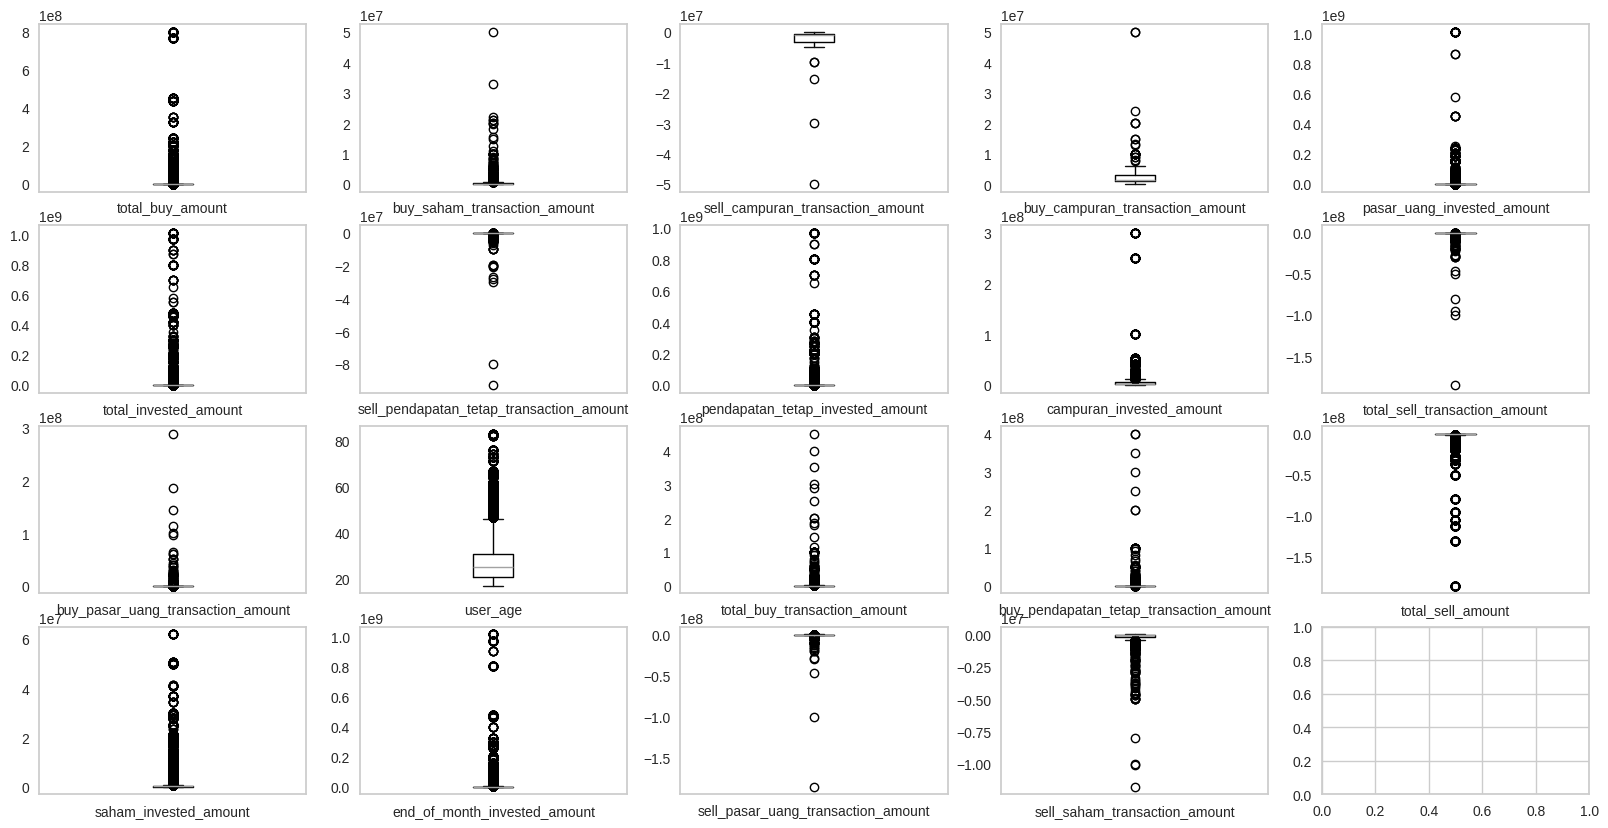

In [ ]:

fig, axes = plt.subplots(nrows=4, ncols=5,figsize=(20,10))
for nomor, kolom in enumerate(numeric):
  df_merged3.boxplot(kolom, ax=axes.flatten()[nomor],grid=False)
plt.show()

In [ ]:
Q1 = df_merged3[numeric].quantile(0.25)
Q3 = df_merged3[numeric].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 total_buy_amount                             100000.00
buy_saham_transaction_amount                  50000.00
sell_campuran_transaction_amount           -3375000.00
buy_campuran_transaction_amount             1000000.00
pasar_uang_invested_amount                    10000.00
total_invested_amount                        100000.00
sell_pendapatan_tetap_transaction_amount    -150000.00
pendapatan_tetap_invested_amount              40000.00
campuran_invested_amount                    1000000.00
total_sell_transaction_amount               -299340.00
buy_pasar_uang_transaction_amount             20000.00
user_age                                         21.00
total_buy_transaction_amount                  40000.00
buy_pendapatan_tetap_transaction_amount       25000.00
total_sell_amount                           -500000.00
saham_invested_amount                         50000.00
end_of_month_invested_amount                 100000.00
sell_pasar_uang_transaction_amount          -100000.00
sell_

In [ ]:
filter_min = df_merged2[numeric] < boxplot_min
filter_max = df_merged2[numeric] > boxplot_max

# Correctly apply the filter to the entire DataFrame
df_non_outlier = df_merged2[~(filter_min | filter_max).any(axis=1)]

df_non_outlier

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
5396,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000,0,...,0.00,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000
5397,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000,0,...,0.00,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000
5398,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000,0,...,0.00,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000
5399,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000,0,...,0.00,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000
5400,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000,0,...,0.00,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156932,3802513,2021-08-10 13:30:57,Female,46,IRT,< 10 Juta,not used,Gaji,10000,0,...,0.00,0.00,0.00,0,0,0.00,10000.00,0.00,0.00,10000
156933,3802513,2021-08-10 13:30:57,Female,46,IRT,< 10 Juta,not used,Gaji,10000,0,...,0.00,0.00,0.00,0,0,0.00,10000.00,0.00,0.00,10000
156934,3802513,2021-08-10 13:30:57,Female,46,IRT,< 10 Juta,not used,Gaji,10000,0,...,0.00,0.00,0.00,0,0,0.00,10000.00,0.00,0.00,10000
156935,3802513,2021-08-10 13:30:57,Female,46,IRT,< 10 Juta,not used,Gaji,10000,0,...,0.00,0.00,0.00,0,0,0.00,10000.00,0.00,0.00,10000


In [ ]:
df_merged2.isna().sum()

,0
user_id,0
registration_import_datetime,0
user_gender,0
user_age,0
user_occupation,0
user_income_range,0
referral_code_used,0
user_income_source,0
end_of_month_invested_amount,0
total_buy_amount,0


Reminder for me

every column will have different value for quantile if we let '0' value or change it to NaN.

df_merged2 ----> still have 0 value

aaa        ----> nan value

In [ ]:
aaa = df_merged2['buy_pendapatan_tetap_transaction_amount']
aaa= aaa.replace(0, np.nan, regex=True)

In [ ]:
len(df_merged2['buy_pendapatan_tetap_transaction_amount'])

158811

In [ ]:
len(aaa[aaa>0])

4086

In [ ]:
df_merged2['buy_pendapatan_tetap_transaction_amount'].quantile(0.5)

np.float64(0.0)

In [ ]:
aaa.quantile(0.5)

np.float64(100000.0)

In [ ]:
df_merged2['buy_pendapatan_tetap_transaction_amount']

,buy_pendapatan_tetap_transaction_amount
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
158806,0.00
158807,0.00
158808,0.00
158809,0.00


#C) EDA

In [ ]:
eda = df_non_outlier.copy()

In [ ]:
#Descriptive analysis of numeric values
pd.set_option('display.float_format', lambda x: '%.2f' % x)

numeric = ['user_age','end_of_month_invested_amount','total_buy_amount','total_sell_amount',
           'total_buy_transaction_amount', 'total_sell_transaction_amount', 'total_invested_amount']

##Descriptive statistics:
* How many users do we have in the data?
* How is the demographic in the data?
* How many users that used referral code?

In [ ]:
# Number of users
eda['user_id'].nunique()

6789

In [ ]:
# Number of users used the referral code
eda.groupby('referral_code_used').agg({'user_id':pd.Series.nunique})

,user_id
referral_code_used,
not used,4330
used referral,2459


### Descriptive information from numerical data

In [ ]:
eda_info = eda.copy()
eda_info = eda_info.replace(0, np.nan, regex=True)

In [ ]:
eda_info

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
5396,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
5397,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
5398,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
5399,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
5400,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156932,3802513,2021-08-10 13:30:57,Female,46,IRT,< 10 Juta,not used,Gaji,10000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10000.00,NaN,NaN,10000.00
156933,3802513,2021-08-10 13:30:57,Female,46,IRT,< 10 Juta,not used,Gaji,10000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10000.00,NaN,NaN,10000.00
156934,3802513,2021-08-10 13:30:57,Female,46,IRT,< 10 Juta,not used,Gaji,10000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10000.00,NaN,NaN,10000.00
156935,3802513,2021-08-10 13:30:57,Female,46,IRT,< 10 Juta,not used,Gaji,10000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10000.00,NaN,NaN,10000.00


In [ ]:
eda_info[numeric].describe()

,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount,total_buy_transaction_amount,total_sell_transaction_amount,total_invested_amount
count,122387.00,82006.00,53835.00,47134.00,4290.00,2416.00,92257.00
mean,25.52,304218.34,258688.09,-186470.70,104799.14,-95120.96,216153.79
std,6.56,385626.19,337644.66,232454.70,121698.14,102747.22,248875.98
min,17.00,114.00,114.00,-1157000.00,114.00,-700000.00,114.00
25%,21.00,100000.00,50000.00,-200000.00,25000.00,-100110.00,100000.00
50%,24.00,160000.00,125000.00,-100000.00,100000.00,-85000.00,100000.00
75%,29.00,400000.00,301500.00,-40000.00,109966.00,-12000.00,255000.00
max,46.00,2600000.00,2350000.00,-5000.00,1000000.00,-1108.00,1650000.00


Insight

- Average total invested amount are Rp216,153.79
- Average buy amount are Rp258,688.09
- Average sell amount are Rp186,470.70

### Descriptive information from string data

In [ ]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122387 entries, 5396 to 156936
Data columns (total 28 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   122387 non-null  string        
 1   registration_import_datetime              122387 non-null  datetime64[ns]
 2   user_gender                               122387 non-null  object        
 3   user_age                                  122387 non-null  int64         
 4   user_occupation                           122387 non-null  object        
 5   user_income_range                         122387 non-null  object        
 6   referral_code_used                        122387 non-null  object        
 7   user_income_source                        122387 non-null  object        
 8   end_of_month_invested_amount              122387 non-null  int64         
 9   total_buy_amount 

In [ ]:
str = [
 'user_gender',
 'user_generation', 'user_occupation',
 'user_income_range', 'referral_code_used', 'user_income_source']

In [ ]:
for i, k in enumerate(str):  # Unpack the tuple into i (index) and k (column name)
  string= eda.groupby(k).agg({'user_id':pd.Series.nunique})
  print(string,'\n')


             user_id
user_gender         
Female          2421
Male            4368 

                 user_id
user_generation         
Gen-X                284
Gen-Y               2860
Gen-Z               3645 

                 user_id
user_occupation         
Guru                  44
IRT                  326
Others               802
PNS                   60
Pelajar             3892
Pengusaha            244
Swasta              1404
TNI/Polisi            17 

                          user_id
user_income_range                
< 10 Juta                    3210
> Rp 1 Miliar                   5
> Rp 100 Juta - 500 Juta      308
> Rp 50 Juta - 100 Juta       967
> Rp 500 Juta - 1 Miliar       15
Rp 10 Juta - 50 Juta         2284 

                    user_id
referral_code_used         
not used               4330
used referral          2459 

                       user_id
user_income_source            
Bunga Simpanan              11
Dari Orang Tua / Anak      419
Dari Suami / istri     

Insights
* The majority of transaction come from male,
* The majority of transaction come from the Gen Z age group,
* The majority of transaction come from the student profession,
* Most of transaction are come from people with income <IDR 10 million and comes from salaries.

###How is the demographic in the data?

####**Users Gender**

In [ ]:
mf1 =eda.groupby('user_gender').agg({'user_id':pd.Series.nunique})
mf= mf1.reset_index()   #Reset the index to make it into a pandas dataframe
mf


,user_gender,user_id
0,Female,2421
1,Male,4368


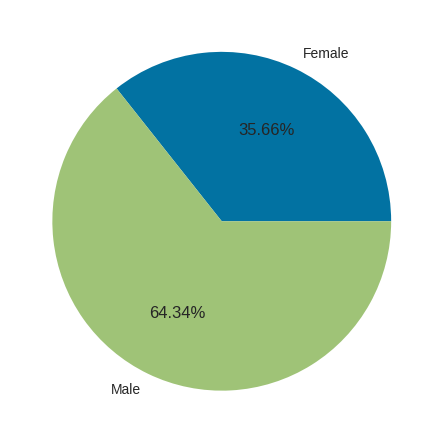

In [ ]:
plt.pie(mf['user_id'],
        labels = mf['user_gender'],
        autopct='%.2f%%') #Create a pie chart, autopct='%.2f%%' to show percent and 2 decimal
plt.show()

Insight

- The majority of users are male

####**Users Generation**

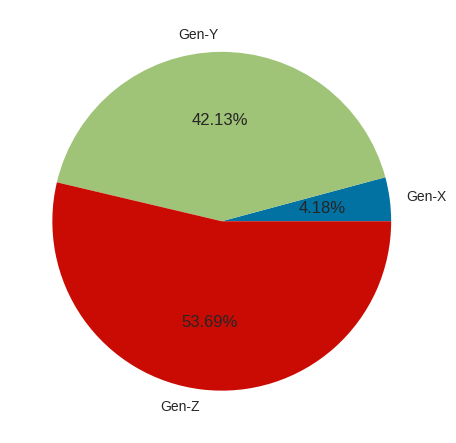

In [ ]:
age1 = eda.groupby('user_generation')['user_id'].nunique()
age = age1.reset_index()   #Reset the index to make it into a pandas dataframe


plt.pie(age['user_id'],
        labels = age['user_generation'],
        autopct='%.2f%%') #Create a pie chart, autopct='%.2f%%' to show percent and 2 decimal
plt.show()

<BarContainer object of 3 artists>

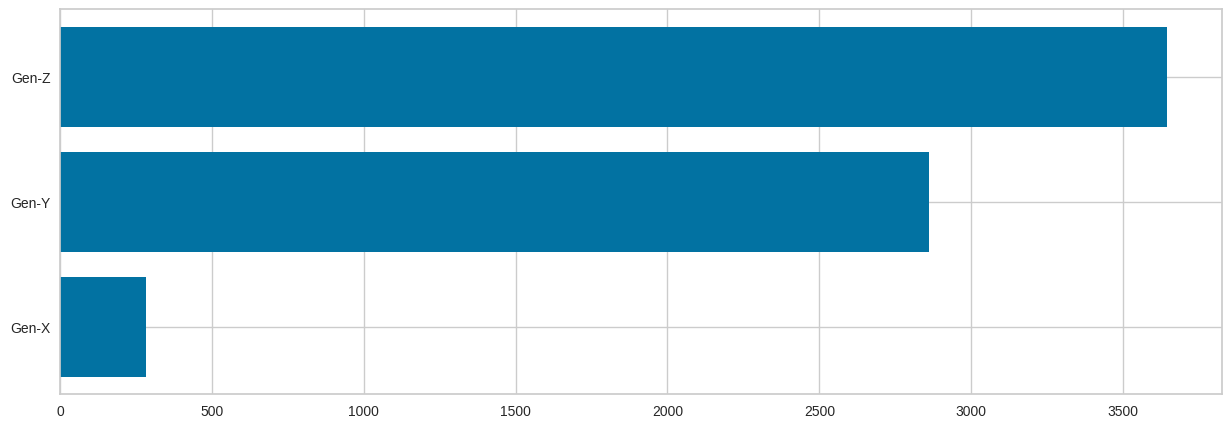

In [ ]:
fig = plt.figure(figsize =(15, 5))    #To create the canvas, figsize is showing size in inches (x,y)

K = age.copy()

K.sort_values('user_id', ascending=True, inplace=True)
x = K['user_generation']    #assign the x
y = K['user_id']         #assign the y

plt.barh(x, y)  #Create the horizontal bar chart

#To show the data labels
#for i, v in enumerate(y):                           #enumerate add numeric besides the data, example = (0, ‘value’)
#    vmil = round(v)                                 #round the y
 #   plt.text(v, i, str(vmil))                       #add text plt.text(x,y,s)

#plt.show()

#### **Occupation**

In [ ]:
eda['user_occupation'] = eda['user_occupation'].astype('string')

In [ ]:
eda.groupby('user_occupation').agg({'user_id':pd.Series.nunique})

,user_id
user_occupation,
Guru,44
IRT,326
Others,802
PNS,60
Pelajar,3892
Pengusaha,244
Swasta,1404
TNI/Polisi,17


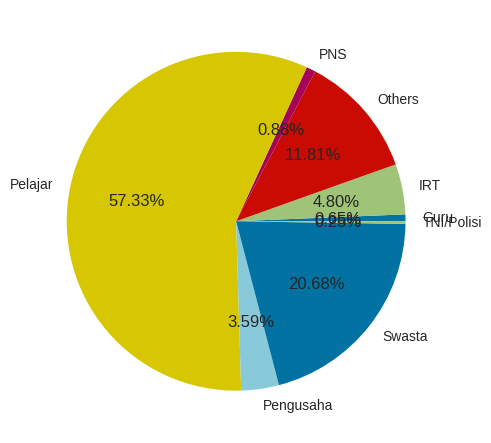

In [ ]:
occu1 = eda.groupby('user_occupation')['user_id'].nunique()
occu = occu1.reset_index()   #Reset the index to make it into a pandas dataframe


plt.pie(occu['user_id'],
        labels = occu['user_occupation'],
        autopct='%.2f%%') #Create a pie chart, autopct='%.2f%%' to show percent and 2 decimal
plt.show()

<BarContainer object of 8 artists>

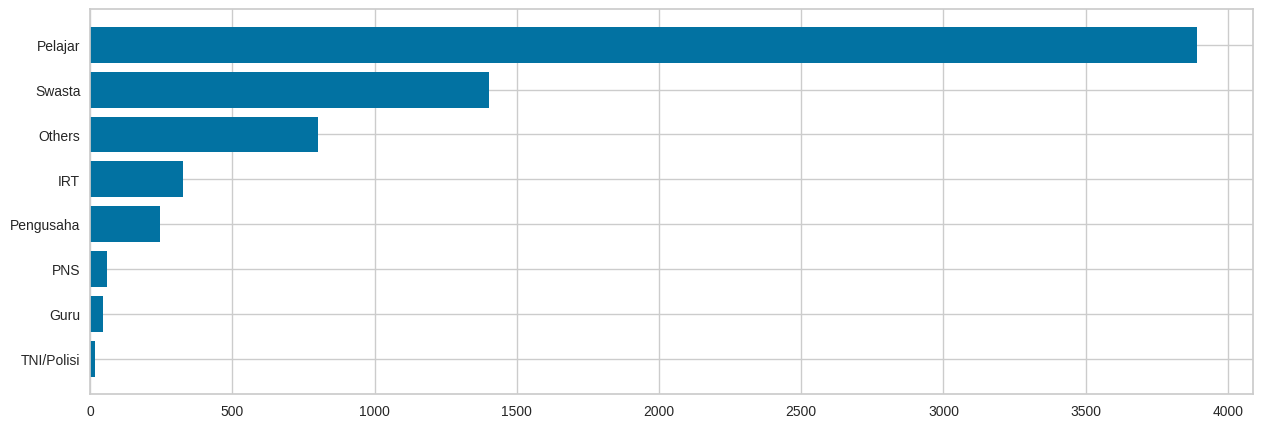

In [ ]:
fig = plt.figure(figsize =(15, 5))    #To create the canvas, figsize is showing size in inches (x,y)

K = occu.copy()

K.sort_values('user_id', ascending=True, inplace=True)
x = K['user_occupation']    #assign the x
y = K['user_id']         #assign the y

plt.barh(x, y)  #Create the horizontal bar chart

#To show the data labels
#for i, v in enumerate(y):                           #enumerate add numeric besides the data, example = (0, ‘value’)
 #   vmil = round(v)                                 #round the y
 #   plt.text(v, i, str(vmil))                       #add text plt.text(x,y,s)

#plt.show()

#### **Income**

In [ ]:
eda['user_income_range'] = eda['user_income_range'].astype('string')

In [ ]:
eda.groupby('user_income_range').agg({'user_id':pd.Series.nunique})

,user_id
user_income_range,
< 10 Juta,3210
> Rp 1 Miliar,5
> Rp 100 Juta - 500 Juta,308
> Rp 50 Juta - 100 Juta,967
> Rp 500 Juta - 1 Miliar,15
Rp 10 Juta - 50 Juta,2284


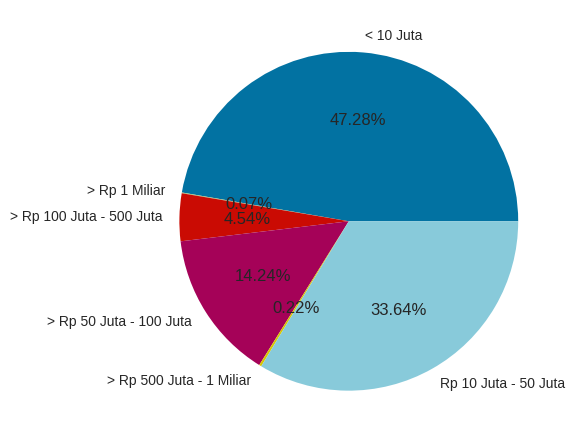

In [ ]:
income1 = eda.groupby('user_income_range')['user_id'].nunique()
income = income1.reset_index()   #Reset the index to make it into a pandas dataframe


plt.pie(income['user_id'],
        labels = income['user_income_range'],
        autopct='%.2f%%') #Create a pie chart, autopct='%.2f%%' to show percent and 2 decimal
plt.show()

In [ ]:
eda['user_income_source'] = eda['user_income_source'].astype('string')

In [ ]:
income3 = eda.groupby('user_income_source')['user_id'].nunique()
income2 = income3.reset_index()   #Reset the index to make it into a pandas dataframe
income2

,user_income_source,user_id
0,Bunga Simpanan,11
1,Dari Orang Tua / Anak,419
2,Dari Suami / istri,50
3,Gaji,4133
4,Hasil Investasi,74
5,Keuntungan Bisnis,812
6,Lainnya,218
7,Tabungan,217
8,Undian,836
9,Warisan,19


In [ ]:
eda['user_income_source'].nunique()
income_source_counts = eda['user_income_source'].value_counts(normalize=True)
income_source_counts = (income_source_counts * 100).round(2).astype('string') + '%'
income_source_counts

,proportion
user_income_source,
Gaji,60.71%
Undian,14.62%
Keuntungan Bisnis,10.96%
Dari Orang Tua / Anak,5.63%
Tabungan,3.17%
Lainnya,3.17%
Hasil Investasi,0.73%
Dari Suami / istri,0.58%
Warisan,0.28%


## **AUM/Balance in end of period**

In [ ]:
end_period = eda[(eda['date']== '2021-08-31') | (eda['date']== '2021-09-30')]
end_period

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
5412,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000,0,...,0.00,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000
5426,2182692,2021-09-07 19:29:10,Male,17,Pelajar,< 10 Juta,used referral,Undian,215000,25000,...,0.00,0.00,0.00,0,0,0.00,140000.00,75000.00,0.00,215000
5431,3426536,2021-09-21 19:27:30,Female,17,Pelajar,< 10 Juta,not used,Undian,100000,0,...,0.00,0.00,0.00,0,0,50000.00,10000.00,40000.00,0.00,100000
5437,336770,2021-09-19 15:12:14,Male,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,604590,504590,...,0.00,0.00,0.00,200000,0,0.00,0.00,604590.00,0.00,604590
5441,3750521,2021-09-22 15:56:47,Male,17,Pelajar,< 10 Juta,not used,Hasil Investasi,10000,0,...,0.00,0.00,0.00,0,0,0.00,10000.00,0.00,0.00,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156869,3736233,2021-08-02 12:29:03,Male,46,Swasta,< 10 Juta,not used,Gaji,200000,100000,...,0.00,0.00,0.00,0,0,0.00,200000.00,0.00,0.00,200000
156880,2478889,2021-08-12 10:39:41,Female,46,Swasta,< 10 Juta,not used,Gaji,100000,0,...,0.00,0.00,0.00,0,0,30000.00,0.00,70000.00,0.00,100000
156902,2478889,2021-08-12 10:39:41,Female,46,Swasta,< 10 Juta,not used,Gaji,100000,0,...,0.00,0.00,0.00,0,0,30000.00,0.00,70000.00,0.00,100000
156914,3802513,2021-08-10 13:30:57,Female,46,IRT,< 10 Juta,not used,Gaji,10000,0,...,0.00,0.00,0.00,0,0,0.00,10000.00,0.00,0.00,10000


In [ ]:
end = end_period[['end_of_month_invested_amount','total_buy_amount','total_sell_amount','buy_saham_transaction_amount','sell_saham_transaction_amount','saham_invested_amount']]
end

,end_of_month_invested_amount,total_buy_amount,total_sell_amount,buy_saham_transaction_amount,sell_saham_transaction_amount,saham_invested_amount
5412,500000,0,0,0.00,0.00,190000.00
5426,215000,25000,0,0.00,0.00,0.00
5431,100000,0,0,0.00,0.00,50000.00
5437,604590,504590,0,0.00,0.00,0.00
5441,10000,0,0,0.00,0.00,0.00
...,...,...,...,...,...,...
156869,200000,100000,0,0.00,0.00,0.00
156880,100000,0,0,0.00,0.00,30000.00
156902,100000,0,0,0.00,0.00,30000.00
156914,10000,0,0,0.00,0.00,0.00


In [ ]:
for i in end.columns:
  dataa = end[i].sum()
  print(i,'\n', dataa,'\n') # \n artinya Enter

end_of_month_invested_amount 
 1562536827 

total_buy_amount 
 769327238 

total_sell_amount 
 -548324088 

buy_saham_transaction_amount 
 15359594.0 

sell_saham_transaction_amount 
 -5209437.0 

saham_invested_amount 
 498010995.0 



**saham nett**

In [ ]:
buy1 =trx['buy_saham_transaction_amount'].sum()
buy1


np.float64(1590346630.0)

In [ ]:
sell1= trx['sell_saham_transaction_amount'].sum()
sell1

np.float64(-461122026.0)

In [ ]:
invest1 = trx['saham_invested_amount'].sum()

In [ ]:
nett1 = invest1-sell1-buy1
nett1

np.float64(45887977215.0)

 **Nett Overall**

In [ ]:
##total invested amount 28111778807

In [ ]:
transaction_total = trx['total_buy_transaction_amount'].sum()
transaction_total

np.int64(12398569409)

In [ ]:
sell_total = trx['total_sell_transaction_amount'].sum()
sell_total

np.int64(-2425462774)

In [ ]:
# total profit generate from the app
profit_total =transaction_total+sell_total
profit_total

np.int64(9973106635)

#Key Trend in dataset

###Daily transaction amount trends for each mutual funds?

In [ ]:
trans = trx[['date','buy_saham_transaction_amount',
       'sell_saham_transaction_amount', 'buy_pasar_uang_transaction_amount',
       'sell_pasar_uang_transaction_amount',
       'buy_pendapatan_tetap_transaction_amount',
       'sell_pendapatan_tetap_transaction_amount',
       'buy_campuran_transaction_amount', 'sell_campuran_transaction_amount']]

In [ ]:
# group by date and sum the total number of transactions for each mutual fund type
trans.groupby('date').sum()

,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount
date,,,,,,,,
2021-08-04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2021-08-05,1430000.00,0.00,2730000.00,-700000.00,10410000.00,0.00,0.00,0.00
2021-08-06,4010000.00,-600000.00,1555000.00,-80000.00,6315000.00,-444930.00,9000000.00,0.00
2021-08-09,4130000.00,-5441108.00,6030000.00,-50780000.00,5315000.00,-1593024.00,25500000.00,0.00
2021-08-10,5779994.00,-1320000.00,14022715.00,-186310000.00,5020000.00,-720000.00,100000.00,0.00
2021-08-11,21455000.00,-3089994.00,261691127.00,-1246000.00,12890030.00,-7460000.00,12500000.00,-10000000.00
2021-08-12,0.00,-2714538.00,0.00,-4966640.00,0.00,-5650326.00,0.00,0.00
2021-08-13,26175000.00,-2157000.00,96238000.00,-5382715.00,262155000.00,-990030.00,20000000.00,0.00
2021-08-16,18005920.00,-4752892.00,16512791.00,-4492656.00,414635000.00,-4660610.00,8100000.00,0.00


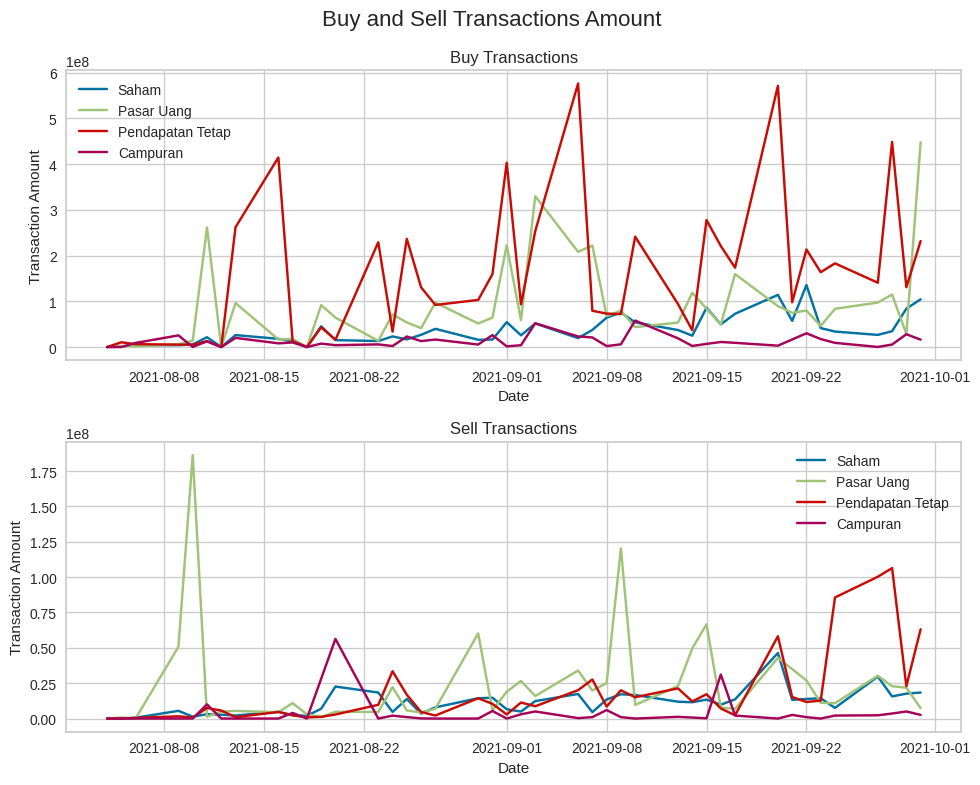

In [ ]:
# Group data by date and calculate the total buy and sell transactions
grouped = trans.groupby('date').sum()
buy = grouped[['buy_saham_transaction_amount', 'buy_pasar_uang_transaction_amount', 'buy_pendapatan_tetap_transaction_amount', 'buy_campuran_transaction_amount']]
sell = grouped[['sell_saham_transaction_amount', 'sell_pasar_uang_transaction_amount', 'sell_pendapatan_tetap_transaction_amount', 'sell_campuran_transaction_amount']].abs()

# Create two separate line charts
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Buy transactions line chart
ax1.plot(buy.index, buy['buy_saham_transaction_amount'], label='Saham')
ax1.plot(buy.index, buy['buy_pasar_uang_transaction_amount'], label='Pasar Uang')
ax1.plot(buy.index, buy['buy_pendapatan_tetap_transaction_amount'], label='Pendapatan Tetap')
ax1.plot(buy.index, buy['buy_campuran_transaction_amount'], label='Campuran')
ax1.set_xlabel('Date')
ax1.set_ylabel('Transaction Amount')
ax1.set_title('Buy Transactions')
ax1.legend()

# Sell transactions line chart
ax2.plot(sell.index, sell['sell_saham_transaction_amount'], label='Saham')
ax2.plot(sell.index, sell['sell_pasar_uang_transaction_amount'], label='Pasar Uang')
ax2.plot(sell.index, sell['sell_pendapatan_tetap_transaction_amount'], label='Pendapatan Tetap')
ax2.plot(sell.index, sell['sell_campuran_transaction_amount'], label='Campuran')
ax2.set_xlabel('Date')
ax2.set_ylabel('Transaction Amount')
ax2.set_title('Sell Transactions')
ax2.legend()

# Add labels
fig.suptitle('Buy and Sell Transactions Amount', fontsize=16)
fig.tight_layout()
plt.show()

Insights
- There is a fluctuating trend towards the daily transaction amount for each mutual funds from August 2021 to September 2021. However, mixed mutual funds generally have the lowest trend compared to other types.

###Daily transaction frequency trends for each mutual funds?

In [ ]:
# Change date data type to datetime
eda['date'] = pd.to_datetime(eda['date'])
# Change date format to yyyy-mm
eda['month'] = eda['date'].dt.strftime('%Y-%m')
eda.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,month
5396,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000,0,...,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000,2021-09
5397,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000,0,...,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000,2021-09
5398,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000,0,...,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000,2021-09
5399,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000,0,...,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000,2021-09
5400,2431071,2021-09-03 14:34:54,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000,0,...,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000,2021-09


sum up the data without zero values

In [ ]:
# count the total transactions happened and  bigger or lower than zero

agg_buy_sell = eda.assign(
buy_saham_frequency=np.where(
    (eda["buy_saham_transaction_amount"] > 0) | (eda["buy_saham_transaction_amount"] < 0),
        1,
        0,
    ),
sell_saham_frequency = np.where(
    (eda["sell_saham_transaction_amount"] > 0) | (eda["sell_saham_transaction_amount"] < 0),
        1,
        0,
    ),
buy_pasar_frequency=np.where(
    (eda["buy_pasar_uang_transaction_amount"] > 0) | (eda["buy_pasar_uang_transaction_amount"] < 0),
        1,
        0,
    ),
sell_pasar_frequency = np.where(
    (eda["sell_pasar_uang_transaction_amount"] > 0) | (eda["sell_pasar_uang_transaction_amount"] < 0),
        1,
        0,
    ),
buy_pendapatan_frequency=np.where(
    (eda["buy_pendapatan_tetap_transaction_amount"] > 0) | (eda["buy_pendapatan_tetap_transaction_amount"] < 0),
        1,
        0,
    ),
sell_pendapatan_frequency = np.where(
    (eda["sell_pendapatan_tetap_transaction_amount"] > 0) | (eda["sell_pendapatan_tetap_transaction_amount"] < 0),
        1,
        0,
    ),
buy_campuran_frequency=np.where(
    (eda["buy_campuran_transaction_amount"] > 0) | (eda["buy_campuran_transaction_amount"] < 0),
        1,
        0,
    ),
sell_campuran_frequency = np.where(
    (eda["sell_campuran_transaction_amount"] > 0) | (eda["sell_campuran_transaction_amount"] < 0),
        1,
        0,
    ),
)

agg_buy_sell_withID = (
  agg_buy_sell.groupby(['user_id','date']) #mainin agg month, date, user id
  .agg({
        "buy_saham_frequency": "sum",
        "sell_saham_frequency": "sum",
        "buy_pasar_frequency": "sum",
        "sell_pasar_frequency": "sum",
        "buy_pendapatan_frequency": "sum",
        "sell_pendapatan_frequency": "sum",
        "buy_campuran_frequency": "sum",
        "sell_campuran_frequency": "sum",
        })
    .reset_index())
agg_buy_sell_withID

,user_id,date,buy_saham_frequency,sell_saham_frequency,buy_pasar_frequency,sell_pasar_frequency,buy_pendapatan_frequency,sell_pendapatan_frequency,buy_campuran_frequency,sell_campuran_frequency
0,1004326,2021-08-19,0,0,0,0,0,0,0,0
1,1004326,2021-08-20,0,0,0,0,0,0,0,0
2,1004326,2021-08-23,0,0,0,0,0,0,0,0
3,1004326,2021-08-24,0,0,0,0,0,0,0,0
4,1004326,2021-08-25,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
122382,997938,2021-09-24,0,0,0,0,0,0,0,0
122383,997938,2021-09-27,0,0,0,0,0,0,0,0
122384,997938,2021-09-28,0,0,0,0,0,0,0,0
122385,997938,2021-09-29,0,0,0,0,0,0,0,0


In [ ]:
frequency_value = list(agg_buy_sell.filter(like='frequency'))
frequency_value

['buy_saham_frequency',
 'sell_saham_frequency',
 'buy_pasar_frequency',
 'sell_pasar_frequency',
 'buy_pendapatan_frequency',
 'sell_pendapatan_frequency',
 'buy_campuran_frequency',
 'sell_campuran_frequency']

In [ ]:
agg_buy_sell = agg_buy_sell_withID.groupby('date')[frequency_value].sum()

In [ ]:
agg_buy_sell = agg_buy_sell.reset_index()
agg_buy_sell

,date,buy_saham_frequency,sell_saham_frequency,buy_pasar_frequency,sell_pasar_frequency,buy_pendapatan_frequency,sell_pendapatan_frequency,buy_campuran_frequency,sell_campuran_frequency
0,2021-08-04,0,0,0,0,0,0,0,0
1,2021-08-05,1,0,3,2,1,0,0,0
2,2021-08-06,6,3,12,1,12,2,0,0
3,2021-08-09,4,12,8,10,9,12,0,0
4,2021-08-10,15,7,14,10,14,9,0,0
5,2021-08-11,14,20,29,10,23,13,0,0
6,2021-08-12,0,15,0,14,0,9,0,0
7,2021-08-13,11,13,33,9,22,5,0,0
8,2021-08-16,19,20,47,20,49,17,1,0
9,2021-08-17,13,11,22,8,16,6,0,0


In [ ]:
## Check validity of code above an turn out works!!
## I used 2021-08-06  as sample and all the record of transactions are same with above code (check the count row for buy/sell)
nyoba = agg_buy_sell[agg_buy_sell['date']=='2021-08-06']
nyoba = nyoba.replace(0,np.nan, regex=True)
nyoba.describe()

,date,buy_saham_frequency,sell_saham_frequency,buy_pasar_frequency,sell_pasar_frequency,buy_pendapatan_frequency,sell_pendapatan_frequency,buy_campuran_frequency,sell_campuran_frequency
count,1,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00
mean,2021-08-06 00:00:00,6.00,3.00,12.00,1.00,12.00,2.00,NaN,NaN
min,2021-08-06 00:00:00,6.00,3.00,12.00,1.00,12.00,2.00,NaN,NaN
25%,2021-08-06 00:00:00,6.00,3.00,12.00,1.00,12.00,2.00,NaN,NaN
50%,2021-08-06 00:00:00,6.00,3.00,12.00,1.00,12.00,2.00,NaN,NaN
75%,2021-08-06 00:00:00,6.00,3.00,12.00,1.00,12.00,2.00,NaN,NaN
max,2021-08-06 00:00:00,6.00,3.00,12.00,1.00,12.00,2.00,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#chart buyy

chart1 = agg_buy_sell.reset_index()
chart1 = chart1[['date','buy_saham_frequency','buy_pasar_frequency','buy_pendapatan_frequency','buy_campuran_frequency']]
chart1 = chart1.melt('date', var_name='cols', value_name='vals')
chart1

,date,cols,vals
0,2021-08-04,buy_saham_frequency,0
1,2021-08-05,buy_saham_frequency,1
2,2021-08-06,buy_saham_frequency,6
3,2021-08-09,buy_saham_frequency,4
4,2021-08-10,buy_saham_frequency,15
...,...,...,...
163,2021-09-24,buy_campuran_frequency,1
164,2021-09-27,buy_campuran_frequency,0
165,2021-09-28,buy_campuran_frequency,0
166,2021-09-29,buy_campuran_frequency,0


In [ ]:
chart1

,date,cols,vals
0,2021-08-04,buy_saham_frequency,0
1,2021-08-05,buy_saham_frequency,1
2,2021-08-06,buy_saham_frequency,6
3,2021-08-09,buy_saham_frequency,4
4,2021-08-10,buy_saham_frequency,15
...,...,...,...
163,2021-09-24,buy_campuran_frequency,1
164,2021-09-27,buy_campuran_frequency,0
165,2021-09-28,buy_campuran_frequency,0
166,2021-09-29,buy_campuran_frequency,0


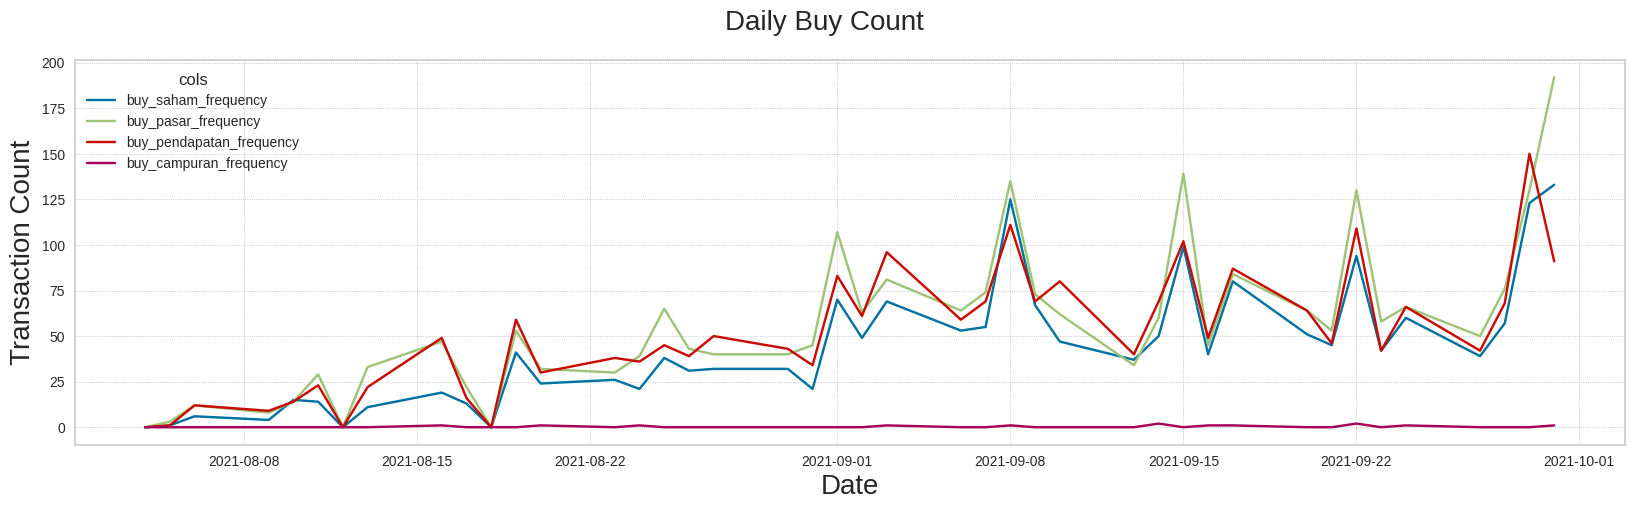

In [ ]:
#chart buyy

fig = plt.figure(figsize=(20, 5))

fig.suptitle('Daily Buy Count', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Transaction Count', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

sns.lineplot(data=chart1, x="date", y="vals", hue="cols")
plt.show()

Insight

- Saham, Pasar Uang and Pendapatan Tetap are 3 most popular funds in the app. Meanwhile campuran fund has the lowest number of transaction than the other funds.

.


In [ ]:
#chart sell

chart2 = agg_buy_sell.reset_index()
chart2 = chart2[['date','sell_saham_frequency','sell_pasar_frequency','sell_pendapatan_frequency','sell_campuran_frequency']]
chart2 = chart2.melt('date', var_name='cols', value_name='vals')
chart2

,date,cols,vals
0,2021-08-04,sell_saham_frequency,0
1,2021-08-05,sell_saham_frequency,0
2,2021-08-06,sell_saham_frequency,3
3,2021-08-09,sell_saham_frequency,12
4,2021-08-10,sell_saham_frequency,7
...,...,...,...
163,2021-09-24,sell_campuran_frequency,1
164,2021-09-27,sell_campuran_frequency,1
165,2021-09-28,sell_campuran_frequency,1
166,2021-09-29,sell_campuran_frequency,0


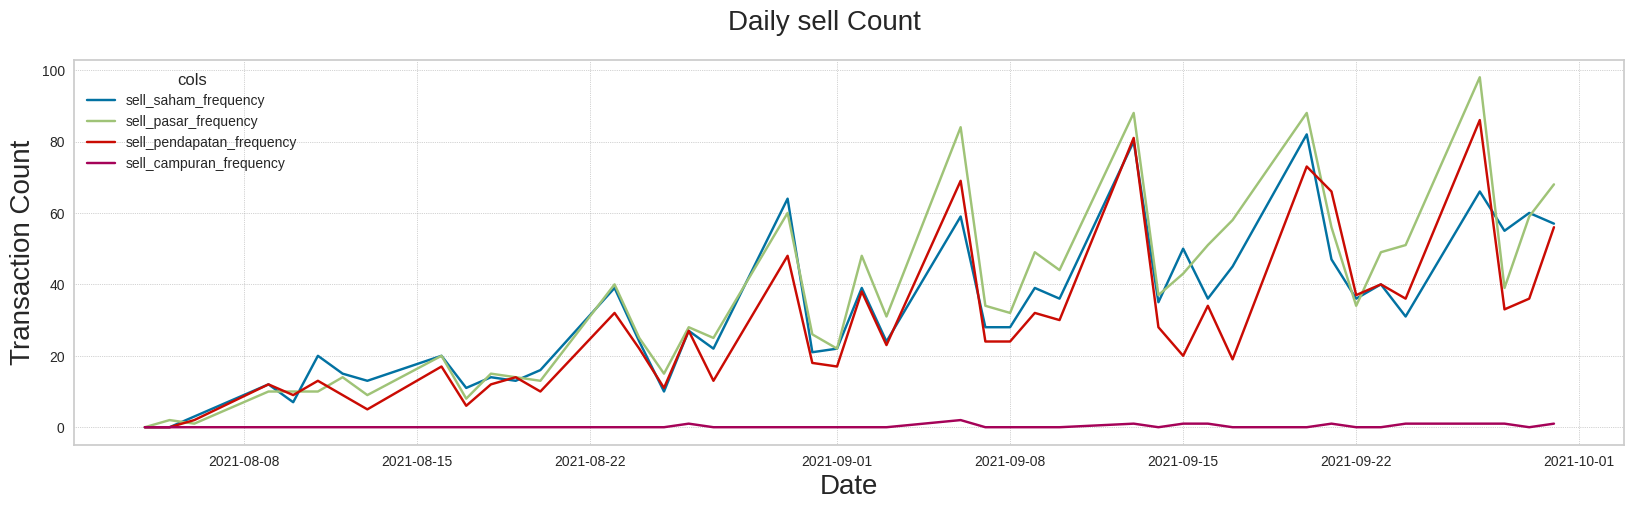

In [ ]:
#chart sell

fig = plt.figure(figsize=(20, 5))

fig.suptitle('Daily sell Count', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Transaction Count', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

sns.lineplot(data=chart2, x="date", y="vals", hue="cols")
plt.show()

Insight
- Saham, Pasar Uang and Pendapatan Tetap are 3 most popular funds in the app. Meanwhile campuran fund has the lowest number of transaction than the other funds.

.


.


### Daily Transaction Trends Buy/Sell

In [ ]:
agg_buy_sell['transactions'] = agg_buy_sell['buy_saham_frequency']+agg_buy_sell['sell_saham_frequency']+agg_buy_sell['buy_pasar_frequency']+agg_buy_sell['sell_pasar_frequency']+agg_buy_sell['buy_pendapatan_frequency']+agg_buy_sell['sell_pendapatan_frequency']+agg_buy_sell['buy_campuran_frequency']+agg_buy_sell['sell_campuran_frequency']
agg_buy_sell.head()

,date,buy_saham_frequency,sell_saham_frequency,buy_pasar_frequency,sell_pasar_frequency,buy_pendapatan_frequency,sell_pendapatan_frequency,buy_campuran_frequency,sell_campuran_frequency,transactions
0,2021-08-04,0,0,0,0,0,0,0,0,0
1,2021-08-05,1,0,3,2,1,0,0,0,7
2,2021-08-06,6,3,12,1,12,2,0,0,36
3,2021-08-09,4,12,8,10,9,12,0,0,55
4,2021-08-10,15,7,14,10,14,9,0,0,69


In [ ]:
agg_buy_sell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       42 non-null     datetime64[ns]
 1   buy_saham_frequency        42 non-null     int64         
 2   sell_saham_frequency       42 non-null     int64         
 3   buy_pasar_frequency        42 non-null     int64         
 4   sell_pasar_frequency       42 non-null     int64         
 5   buy_pendapatan_frequency   42 non-null     int64         
 6   sell_pendapatan_frequency  42 non-null     int64         
 7   buy_campuran_frequency     42 non-null     int64         
 8   sell_campuran_frequency    42 non-null     int64         
 9   transactions               42 non-null     int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 3.4 KB


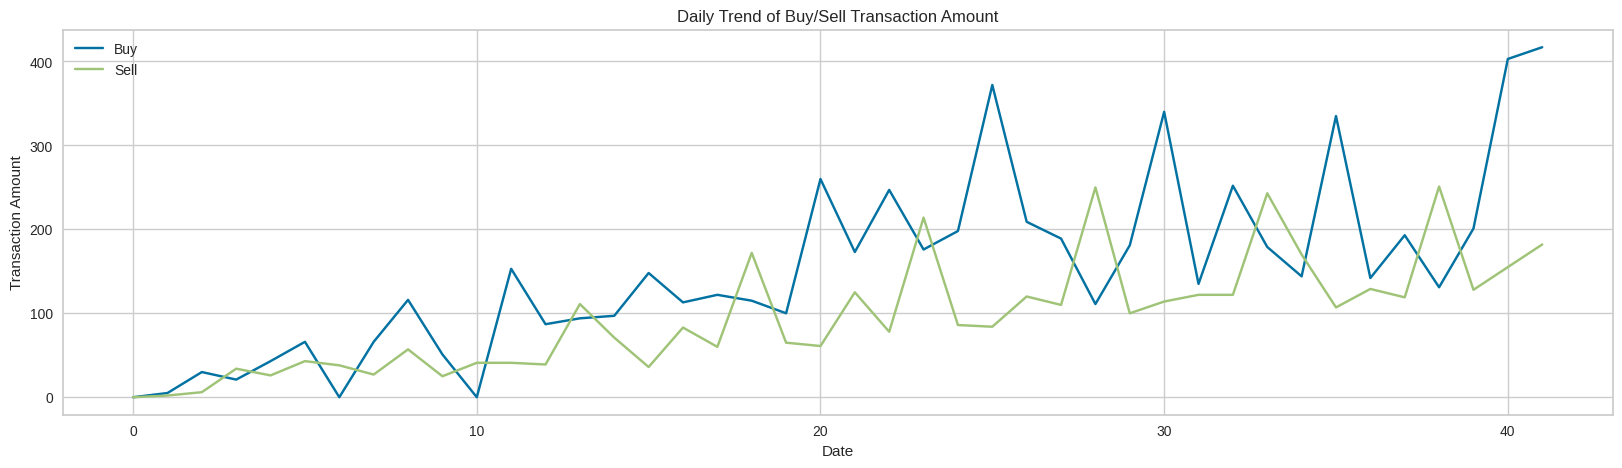

In [ ]:
# Number of buy and sell per day

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

# Create a new column for the total buy transaction amount
agg_buy_sell['total_buy'] = agg_buy_sell.filter(like='buy').sum(axis=1)

# Create a new column for the total sell transaction amount
agg_buy_sell['total_sell'] = agg_buy_sell.filter(like='sell').sum(axis=1)

# Create the line plot
plt.plot(agg_buy_sell.index, agg_buy_sell['total_buy'], label='Buy')
plt.plot(agg_buy_sell.index, agg_buy_sell['total_sell'].abs(), label='Sell')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.title('Daily Trend of Buy/Sell Transaction Amount')
plt.legend()

plt.show()

Insight
- In general buying value has higher than the selling value in the term aug-sep 2021

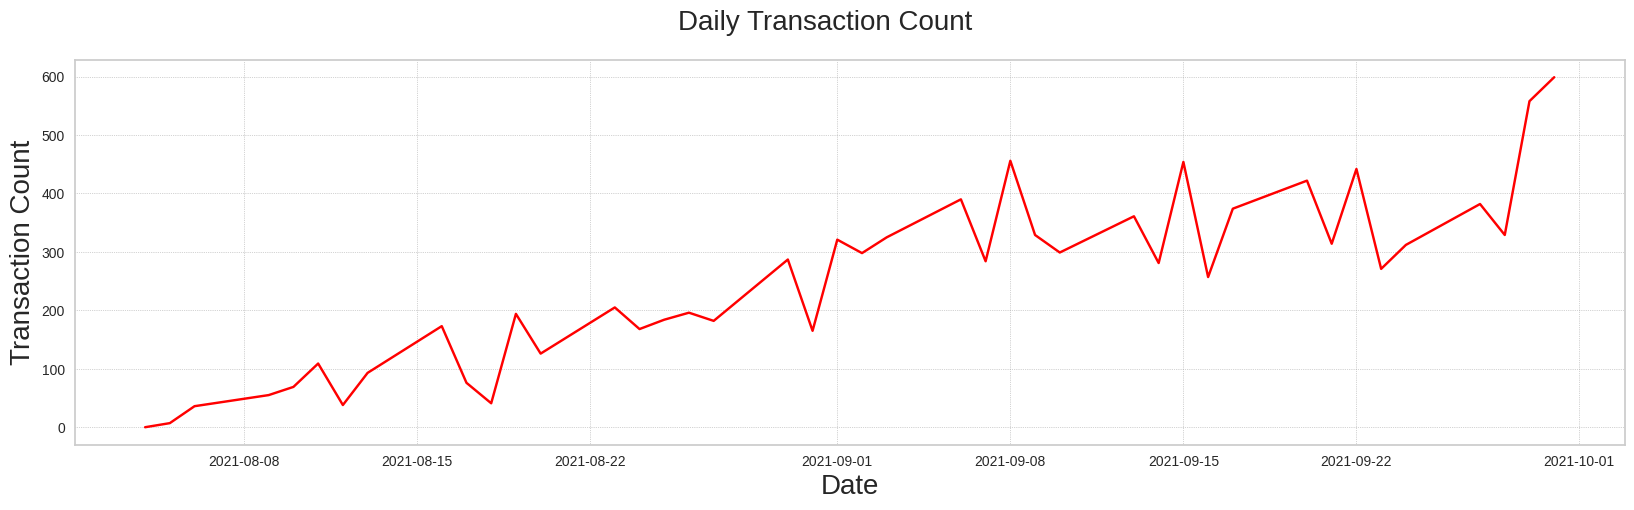

In [ ]:
# Number of transactions (consist of buy and sell) ---- then we can identify the transactions trend


chart3 = agg_buy_sell.reset_index()
chart3 = chart3[['date','transactions']]
chart3= chart3.melt('date', var_name='cols', value_name='vals')

fig = plt.figure(figsize=(20, 5))

fig.suptitle('Daily Transaction Count', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Transaction Count', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

sns.lineplot(data=chart3, x="date", y="vals", color="red")
plt.show()

Insight

- as the graphic above we can see the transaction has increase overtime from August to September

.

.


.


.




#D) Customer Segmentation

**In this case we focus on transactions in September 2021**

\
\
so we can filter the data that happen in September 2021

##Data Preperation

### Frequency data

In [ ]:
df_frequency = agg_buy_sell_withID.copy()

In [ ]:
df_frequency = df_frequency.groupby('user_id')[frequency_value].sum()
df_frequency = df_frequency.reset_index()

In [ ]:
df_frequency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6789 entries, 0 to 6788
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   user_id                    6789 non-null   string
 1   buy_saham_frequency        6789 non-null   int64 
 2   sell_saham_frequency       6789 non-null   int64 
 3   buy_pasar_frequency        6789 non-null   int64 
 4   sell_pasar_frequency       6789 non-null   int64 
 5   buy_pendapatan_frequency   6789 non-null   int64 
 6   sell_pendapatan_frequency  6789 non-null   int64 
 7   buy_campuran_frequency     6789 non-null   int64 
 8   sell_campuran_frequency    6789 non-null   int64 
dtypes: int64(8), string(1)
memory usage: 477.5 KB


## User Segmentation

### Gender and Referral code Labelling

convert the string data to interger  (1 and 0)

In [ ]:
eda2 = eda.copy()
throw = ['registration_import_datetime','date','month']

In [ ]:
eda2.drop(columns = throw,inplace=True)

In [ ]:
eda2 = eda2.drop_duplicates(subset=['user_id'])

In [ ]:
eda2

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
5396,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,500000,0,0,...,0.00,0.00,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000
5413,2182692,Male,17,Pelajar,< 10 Juta,used referral,Undian,215000,25000,0,...,0.00,0.00,0.00,0,0,0.00,140000.00,50000.00,0.00,190000
5427,3426536,Female,17,Pelajar,< 10 Juta,not used,Undian,100000,0,0,...,0.00,0.00,0.00,0,0,50000.00,10000.00,40000.00,0.00,100000
5432,336770,Male,17,Pelajar,Rp 10 Juta - 50 Juta,not used,Undian,604590,504590,0,...,0.00,0.00,0.00,0,0,0.00,0.00,100000.00,0.00,100000
5438,3750521,Male,17,Pelajar,< 10 Juta,not used,Hasil Investasi,10000,0,0,...,0.00,0.00,0.00,0,0,0.00,10000.00,0.00,0.00,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156747,4083520,Female,46,Swasta,> Rp 100 Juta - 500 Juta,used referral,Keuntungan Bisnis,0,0,-10000,...,0.00,0.00,0.00,0,0,0.00,0.00,10000.00,0.00,10000
156754,3990544,Female,46,Swasta,> Rp 100 Juta - 500 Juta,not used,Gaji,300000,0,0,...,0.00,0.00,0.00,0,0,0.00,0.00,300000.00,0.00,300000
156829,3736233,Male,46,Swasta,< 10 Juta,not used,Gaji,200000,100000,0,...,0.00,0.00,0.00,0,0,0.00,100000.00,0.00,0.00,100000
156870,2478889,Female,46,Swasta,< 10 Juta,not used,Gaji,100000,0,0,...,0.00,0.00,0.00,0,0,30000.00,0.00,70000.00,0.00,100000


In [ ]:
eda2.loc[eda2['referral_code_used'] == 'used referral', 'referral'] = '1'
eda2.loc[eda2['referral_code_used'] == 'not used', 'referral'] = '0'

eda2.loc[eda2['user_gender'] == 'Male', 'gender'] = '0'
eda2.loc[eda2['user_gender'] == 'Female', 'gender'] = '1'


eda3 = eda2.copy()
eda3.drop(['user_age'],axis=1,inplace=True)
eda3.drop(['referral_code_used'],axis=1,inplace=True)
eda3.drop(['user_gender'],axis=1,inplace=True)


eda3['gender']= pd.to_numeric(eda3['gender'])
eda3['referral'] = pd.to_numeric(eda3['referral'])
eda3.head()

,user_id,user_occupation,user_income_range,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_generation,buy_saham_transaction_amount,sell_saham_transaction_amount,...,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,referral,gender
5396,2431071,Pelajar,Rp 10 Juta - 50 Juta,Undian,500000,0,0,Gen-Z,0.00,0.00,...,0.00,0,0,190000.00,40000.00,270000.00,0.00,500000,0,1
5413,2182692,Pelajar,< 10 Juta,Undian,215000,25000,0,Gen-Z,0.00,0.00,...,0.00,0,0,0.00,140000.00,50000.00,0.00,190000,1,0
5427,3426536,Pelajar,< 10 Juta,Undian,100000,0,0,Gen-Z,0.00,0.00,...,0.00,0,0,50000.00,10000.00,40000.00,0.00,100000,0,1
5432,336770,Pelajar,Rp 10 Juta - 50 Juta,Undian,604590,504590,0,Gen-Z,0.00,0.00,...,0.00,0,0,0.00,0.00,100000.00,0.00,100000,0,0
5438,3750521,Pelajar,< 10 Juta,Hasil Investasi,10000,0,0,Gen-Z,0.00,0.00,...,0.00,0,0,0.00,10000.00,0.00,0.00,10000,0,0


### User Generation, Occupation and Income Encoding

For variables that have many categories, we can do One Hot Encoding.

In [ ]:
eda3['user_income_range'].unique()

<StringArray>
[    'Rp 10 Juta - 50 Juta',                '< 10 Juta',
  '> Rp 50 Juta - 100 Juta', '> Rp 100 Juta - 500 Juta',
            '> Rp 1 Miliar', '> Rp 500 Juta - 1 Miliar']
Length: 6, dtype: string

In [ ]:
eda3['user_income_range'].value_counts()

,count
user_income_range,
< 10 Juta,3210
Rp 10 Juta - 50 Juta,2284
> Rp 50 Juta - 100 Juta,967
> Rp 100 Juta - 500 Juta,308
> Rp 500 Juta - 1 Miliar,15
> Rp 1 Miliar,5


In [ ]:
eda3['user_occupation'].value_counts()

,count
user_occupation,
Pelajar,3892
Swasta,1404
Others,802
IRT,326
Pengusaha,244
PNS,60
Guru,44
TNI/Polisi,17


In [ ]:
eda3['user_income_source'].value_counts()

,count
user_income_source,
Gaji,4133
Undian,836
Keuntungan Bisnis,812
Dari Orang Tua / Anak,419
Lainnya,218
Tabungan,217
Hasil Investasi,74
Dari Suami / istri,50
Warisan,19


In [ ]:
#simplify categorical value

eda3.loc[eda3['user_occupation'] == 'PNS', 'user_occupation'] = 'Others'
eda3.loc[eda3['user_occupation'] == 'Guru', 'user_occupation'] = 'Others'
eda3.loc[eda3['user_occupation'] == 'TNI/Polisi', 'user_occupation'] = 'Others'
eda3.loc[eda3['user_occupation'] == 'Pensiunan', 'user_occupation'] = 'Others'
eda3.loc[eda3['user_occupation'] == 'Pengusaha', 'user_occupation'] = 'Others'
eda3.loc[eda3['user_occupation'] == 'IRT', 'user_occupation'] = 'Others'


eda3.loc[eda3['user_income_range'] == '> Rp 50 Juta - 100 Juta', 'user_income_range'] = '> Rp 50 Juta'
eda3.loc[eda3['user_income_range'] == '> Rp 100 Juta - 500 Juta', 'user_income_range'] = '> Rp 50 Juta'
eda3.loc[eda3['user_income_range'] == '> Rp 500 Juta - 1 Miliar', 'user_income_range'] = '> Rp 50 Juta'
eda3.loc[eda3['user_income_range'] == '> Rp 1 Miliar', 'user_income_range'] = '> Rp 50 Juta'

eda3.loc[eda3['user_income_source'] == 'Bunga Simpanan', 'user_income_source'] = 'Others'
eda3.loc[eda3['user_income_source'] == 'Warisan', 'user_income_source'] = 'Others'
eda3.loc[eda3['user_income_source'] == 'Dari Suami / istri', 'user_income_source'] = 'Others'
eda3.loc[eda3['user_income_source'] == 'Hasil Investasi', 'user_income_source'] = 'Others'
eda3.loc[eda3['user_income_source'] == 'Tabungan', 'user_income_source'] = 'Others'
eda3.loc[eda3['user_income_source'] == 'Lainnya', 'user_income_source'] = 'Others'
eda3.loc[eda3['user_income_source'] == 'Dari Orang Tua / Anak', 'user_income_source'] = 'Others'

In [ ]:
eda3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6789 entries, 5396 to 156903
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_id                                   6789 non-null   string 
 1   user_occupation                           6789 non-null   string 
 2   user_income_range                         6789 non-null   string 
 3   user_income_source                        6789 non-null   string 
 4   end_of_month_invested_amount              6789 non-null   int64  
 5   total_buy_amount                          6789 non-null   int64  
 6   total_sell_amount                         6789 non-null   int64  
 7   user_generation                           6789 non-null   object 
 8   buy_saham_transaction_amount              6789 non-null   float64
 9   sell_saham_transaction_amount             6789 non-null   float64
 10  buy_pasar_uang_transaction_amount   

In [ ]:
eda3.drop(['buy_saham_transaction_amount','sell_saham_transaction_amount','buy_pasar_uang_transaction_amount','sell_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount',
                  'sell_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount','sell_campuran_transaction_amount','end_of_month_invested_amount','total_buy_amount',
           'total_sell_amount','total_buy_transaction_amount','total_sell_transaction_amount'],axis=1,inplace= True)
eda3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6789 entries, 5396 to 156903
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           6789 non-null   string 
 1   user_occupation                   6789 non-null   string 
 2   user_income_range                 6789 non-null   string 
 3   user_income_source                6789 non-null   string 
 4   user_generation                   6789 non-null   object 
 5   saham_invested_amount             6789 non-null   float64
 6   pasar_uang_invested_amount        6789 non-null   float64
 7   pendapatan_tetap_invested_amount  6789 non-null   float64
 8   campuran_invested_amount          6789 non-null   float64
 9   total_invested_amount             6789 non-null   int64  
 10  referral                          6789 non-null   int64  
 11  gender                            6789 non-null   int64  
dtypes: flo

In [ ]:
trash = eda3.filter(like = 'amount')

In [ ]:
eda3.drop(columns=trash,inplace=True)

In [ ]:
eda4 = eda3.copy()
eda4 = pd.get_dummies(eda4, columns=['user_generation','user_occupation','user_income_source','user_income_range'])
eda4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6789 entries, 5396 to 156903
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   user_id                                 6789 non-null   string 
 1   referral                                6789 non-null   int64  
 2   gender                                  6789 non-null   int64  
 3   user_generation_Gen-X                   6789 non-null   bool   
 4   user_generation_Gen-Y                   6789 non-null   bool   
 5   user_generation_Gen-Z                   6789 non-null   bool   
 6   user_occupation_Others                  6789 non-null   boolean
 7   user_occupation_Pelajar                 6789 non-null   boolean
 8   user_occupation_Swasta                  6789 non-null   boolean
 9   user_income_source_Gaji                 6789 non-null   boolean
 10  user_income_source_Keuntungan Bisnis    6789 non-null   bool

In [ ]:
merge = eda4.merge(df_frequency, how='inner', left_on =['user_id'], right_on = ['user_id'])
merge


,user_id,referral,gender,user_generation_Gen-X,user_generation_Gen-Y,user_generation_Gen-Z,user_occupation_Others,user_occupation_Pelajar,user_occupation_Swasta,user_income_source_Gaji,...,user_income_range_> Rp 50 Juta,user_income_range_Rp 10 Juta - 50 Juta,buy_saham_frequency,sell_saham_frequency,buy_pasar_frequency,sell_pasar_frequency,buy_pendapatan_frequency,sell_pendapatan_frequency,buy_campuran_frequency,sell_campuran_frequency
0,2431071,0,1,False,False,True,False,True,False,False,...,False,True,0,0,0,0,0,0,0,0
1,2182692,1,0,False,False,True,False,True,False,False,...,False,False,0,0,0,0,1,0,0,0
2,3426536,0,1,False,False,True,False,True,False,False,...,False,False,0,0,0,0,0,0,0,0
3,336770,0,0,False,False,True,False,True,False,False,...,False,True,0,0,0,0,2,0,0,0
4,3750521,0,0,False,False,True,False,True,False,False,...,False,False,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,4083520,1,1,True,False,False,False,False,True,False,...,True,False,0,0,0,0,0,1,0,0
6785,3990544,0,1,True,False,False,False,False,True,True,...,True,False,0,0,0,0,0,0,0,0
6786,3736233,0,0,True,False,False,False,False,True,True,...,False,False,0,0,1,0,0,0,0,0
6787,2478889,0,1,True,False,False,False,False,True,True,...,False,False,0,0,0,0,0,0,0,0


In [ ]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6789 entries, 0 to 6788
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   user_id                                 6789 non-null   string 
 1   referral                                6789 non-null   int64  
 2   gender                                  6789 non-null   int64  
 3   user_generation_Gen-X                   6789 non-null   bool   
 4   user_generation_Gen-Y                   6789 non-null   bool   
 5   user_generation_Gen-Z                   6789 non-null   bool   
 6   user_occupation_Others                  6789 non-null   boolean
 7   user_occupation_Pelajar                 6789 non-null   boolean
 8   user_occupation_Swasta                  6789 non-null   boolean
 9   user_income_source_Gaji                 6789 non-null   boolean
 10  user_income_source_Keuntungan Bisnis    6789 non-null   bool

In [ ]:
merge2 = merge.copy()

In [ ]:
merge2['saham_frequency']  = merge2['buy_saham_frequency']
merge2['pasar_frequency']  = merge2['buy_pasar_frequency']
merge2['pendapatan_frequency']  = merge2['buy_pendapatan_frequency']
merge2['campuran_frequency']  = merge2['buy_campuran_frequency']

In [ ]:
throw_again = ['buy_saham_frequency','sell_saham_frequency','buy_pasar_frequency','sell_pasar_frequency','buy_pendapatan_frequency','sell_pendapatan_frequency','buy_campuran_frequency','sell_campuran_frequency']

In [ ]:
merge2.drop(columns=throw_again,inplace=True)

In [ ]:
merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6789 entries, 0 to 6788
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   user_id                                 6789 non-null   string 
 1   referral                                6789 non-null   int64  
 2   gender                                  6789 non-null   int64  
 3   user_generation_Gen-X                   6789 non-null   bool   
 4   user_generation_Gen-Y                   6789 non-null   bool   
 5   user_generation_Gen-Z                   6789 non-null   bool   
 6   user_occupation_Others                  6789 non-null   boolean
 7   user_occupation_Pelajar                 6789 non-null   boolean
 8   user_occupation_Swasta                  6789 non-null   boolean
 9   user_income_source_Gaji                 6789 non-null   boolean
 10  user_income_source_Keuntungan Bisnis    6789 non-null   bool

### **Standardize**

Standardize our data using min max scaler so that all values have the same range so that it can increase the performance of our clustering model.

In [ ]:
scaler = MinMaxScaler()
std_data = merge2.set_index('user_id')
std_data[:] = scaler.fit_transform(std_data[:])
std_data

<ipython-input-744-2083ceb13a75>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 1. 1. 1.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  std_data[:] = scaler.fit_transform(std_data[:])
<ipython-input-744-2083ceb13a75>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  std_data[:] = scaler.fit_transform(std_data[:])
<ipython-input-744-2083ceb13a75>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1. 1. 1. ... 0. 0. 0.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  std_data[:] = scaler.fit_transform(std_data[:])
<ipython-input-744-2083ceb13a75>:3: FutureWarning: Sett

,referral,gender,user_generation_Gen-X,user_generation_Gen-Y,user_generation_Gen-Z,user_occupation_Others,user_occupation_Pelajar,user_occupation_Swasta,user_income_source_Gaji,user_income_source_Keuntungan Bisnis,user_income_source_Others,user_income_source_Undian,user_income_range_< 10 Juta,user_income_range_> Rp 50 Juta,user_income_range_Rp 10 Juta - 50 Juta,saham_frequency,pasar_frequency,pendapatan_frequency,campuran_frequency
user_id,,,,,,,,,,,,,,,,,,,
2431071,0,1,0.00,0.00,1.00,False,True,False,False,False,False,True,False,False,True,0.00,0.00,0.00,0.00
2182692,1,0,0.00,0.00,1.00,False,True,False,False,False,False,True,True,False,False,0.00,0.00,0.11,0.00
3426536,0,1,0.00,0.00,1.00,False,True,False,False,False,False,True,True,False,False,0.00,0.00,0.00,0.00
336770,0,0,0.00,0.00,1.00,False,True,False,False,False,False,True,False,False,True,0.00,0.00,0.22,0.00
3750521,0,0,0.00,0.00,1.00,False,True,False,False,False,True,False,True,False,False,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083520,1,1,1.00,0.00,0.00,False,False,True,False,True,False,False,False,True,False,0.00,0.00,0.00,0.00
3990544,0,1,1.00,0.00,0.00,False,False,True,True,False,False,False,False,True,False,0.00,0.00,0.00,0.00
3736233,0,0,1.00,0.00,0.00,False,False,True,True,False,False,False,True,False,False,0.00,0.07,0.00,0.00


In [ ]:
std_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6789 entries, 2431071 to 3802513
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   referral                                6789 non-null   int64  
 1   gender                                  6789 non-null   int64  
 2   user_generation_Gen-X                   6789 non-null   float64
 3   user_generation_Gen-Y                   6789 non-null   float64
 4   user_generation_Gen-Z                   6789 non-null   float64
 5   user_occupation_Others                  6789 non-null   boolean
 6   user_occupation_Pelajar                 6789 non-null   boolean
 7   user_occupation_Swasta                  6789 non-null   boolean
 8   user_income_source_Gaji                 6789 non-null   boolean
 9   user_income_source_Keuntungan Bisnis    6789 non-null   boolean
 10  user_income_source_Others               6789 non-null   

## **Determine Cluster Number**

There are 2 kinds of clustering techniques, RFM and K-Means Clustering. RFM can be used to segment based on recency, frequency, and monetary. So since we want to segment based on socio-economic background, it would be more appropriate to use **K-Means**. By using K-Means we can use as many variables as we need.

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes

For k=2, the average silhouette score is 0.23610189792919306
For k=3, the average silhouette score is 0.18785244551535638
For k=4, the average silhouette score is 0.1628775008229345
For k=5, the average silhouette score is 0.20200839604667645
For k=6, the average silhouette score is 0.2117629129138041
For k=7, the average silhouette score is 0.20721397640947545
For k=8, the average silhouette score is 0.2428535014910259
For k=9, the average silhouette score is 0.25218465253325917
For k=10, the average silhouette score is 0.26114631828689244


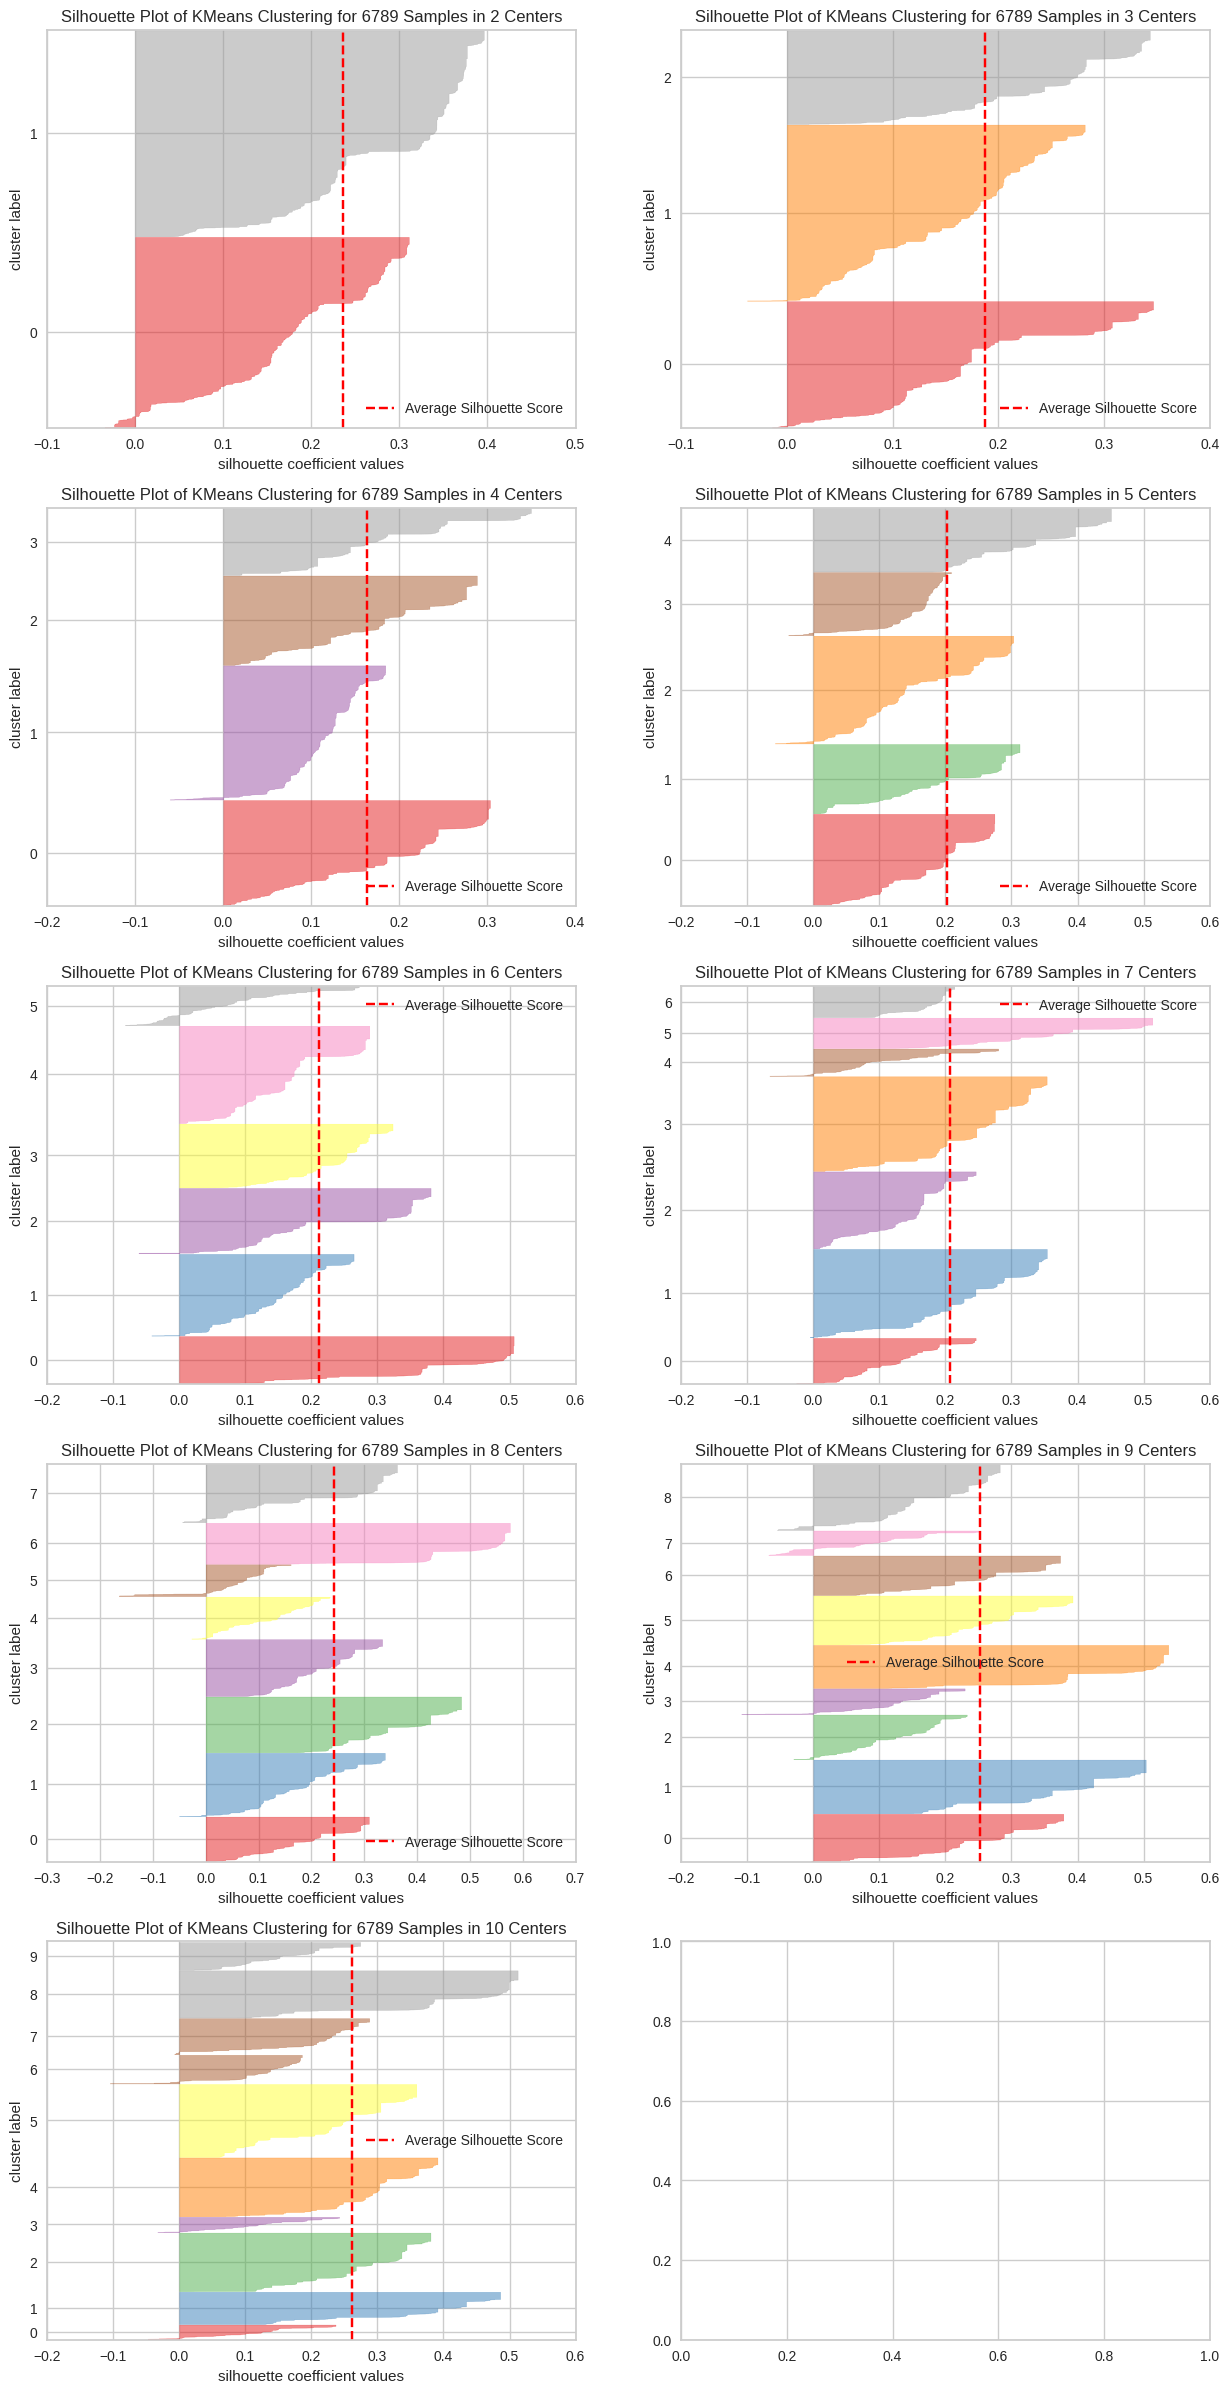

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(std_data)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")


[18985.249393273993, 14451.774741131982, 12929.8904664184, 11686.507822205773, 11138.724187184846, 10333.588535730285, 9498.963916210838, 9319.535842032916, 9097.383610352877, 8859.568106055223]


<Figure size 1600x800 with 0 Axes>

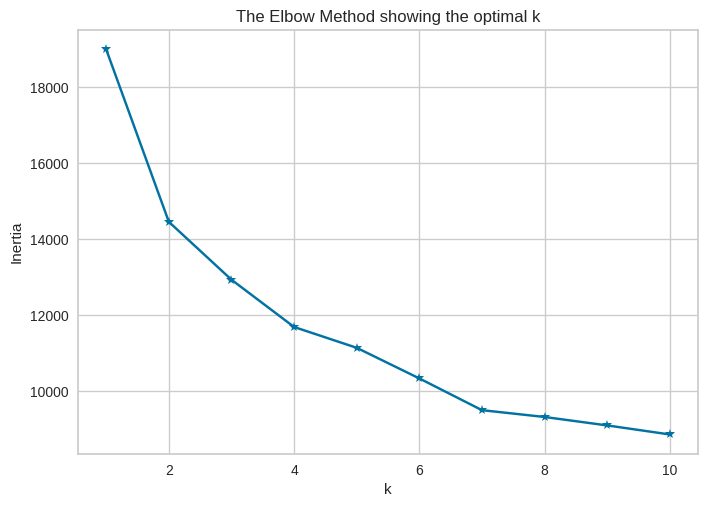

In [ ]:
# For each n_clusters between 1 and 11, we calculate the distortion value
distortions = []
K = range(1,11)
for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 42)
  kmeanModel.fit(std_data)
  distortions.append(kmeanModel.inertia_)

print(distortions)

plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

-

based on silhouette method I prefer to choose n-cluster = 4. because with 4 clusters the spread of data looks balanced.

-

In [ ]:
std_data.reset_index(inplace=True)

In [ ]:
df_cluster = std_data.copy()

In [ ]:
#Best result is 4 clusters
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_cluster)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2225, cost: 28142.0
Run 1, iteration: 2/100, moves: 60, cost: 28142.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 849, cost: 29301.0
Run 2, iteration: 2/100, moves: 75, cost: 29301.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2044, cost: 27140.0
Run 3, iteration: 2/100, moves: 685, cost: 27092.0
Run 3, iteration: 3/100, moves: 2, cost: 27092.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2259, cost: 27434.0
Run 4, iteration: 2/100, moves: 760, cost: 27107.0
Run 4, iteration: 3/100, moves: 287, cost: 27107.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1307, cost: 29021.0
Run 5, iteration: 2/100, moves: 52, cos

array([2, 0, 0, ..., 3, 3, 1], dtype=uint16)

In [ ]:
df_cluster.insert(0, "cluster", clusters, True)

In [ ]:
df_cluster

,cluster,user_id,referral,gender,user_generation_Gen-X,user_generation_Gen-Y,user_generation_Gen-Z,user_occupation_Others,user_occupation_Pelajar,user_occupation_Swasta,...,user_income_source_Keuntungan Bisnis,user_income_source_Others,user_income_source_Undian,user_income_range_< 10 Juta,user_income_range_> Rp 50 Juta,user_income_range_Rp 10 Juta - 50 Juta,saham_frequency,pasar_frequency,pendapatan_frequency,campuran_frequency
0,2,2431071,0,1,0.00,0.00,1.00,False,True,False,...,False,False,True,False,False,True,0.00,0.00,0.00,0.00
1,0,2182692,1,0,0.00,0.00,1.00,False,True,False,...,False,False,True,True,False,False,0.00,0.00,0.11,0.00
2,0,3426536,0,1,0.00,0.00,1.00,False,True,False,...,False,False,True,True,False,False,0.00,0.00,0.00,0.00
3,2,336770,0,0,0.00,0.00,1.00,False,True,False,...,False,False,True,False,False,True,0.00,0.00,0.22,0.00
4,0,3750521,0,0,0.00,0.00,1.00,False,True,False,...,False,True,False,True,False,False,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,3,4083520,1,1,1.00,0.00,0.00,False,False,True,...,True,False,False,False,True,False,0.00,0.00,0.00,0.00
6785,3,3990544,0,1,1.00,0.00,0.00,False,False,True,...,False,False,False,False,True,False,0.00,0.00,0.00,0.00
6786,3,3736233,0,0,1.00,0.00,0.00,False,False,True,...,False,False,False,True,False,False,0.00,0.07,0.00,0.00
6787,3,2478889,0,1,1.00,0.00,0.00,False,False,True,...,False,False,False,True,False,False,0.00,0.00,0.00,0.00


In [ ]:
df_cluster2 = df_cluster[['user_id','cluster']]

In [ ]:
#cluster_model = cluster.KMeans(n_clusters=4)
#cluster_model.fit(std_data)
#cluster_label = cluster_model.labels_
#std_data['cluster'] = cluster_label
#df_result = std_data.reset_index()[['user_id','cluster']]
#df_result

-

Preapare eda3 to merge with cluster result. eda3 still have original columns and one step before we do one hot encoding

-

In [ ]:
eda3

,user_id,user_occupation,user_income_range,user_income_source,user_generation,referral,gender
5396,2431071,Pelajar,Rp 10 Juta - 50 Juta,Undian,Gen-Z,0,1
5413,2182692,Pelajar,< 10 Juta,Undian,Gen-Z,1,0
5427,3426536,Pelajar,< 10 Juta,Undian,Gen-Z,0,1
5432,336770,Pelajar,Rp 10 Juta - 50 Juta,Undian,Gen-Z,0,0
5438,3750521,Pelajar,< 10 Juta,Others,Gen-Z,0,0
...,...,...,...,...,...,...,...
156747,4083520,Swasta,> Rp 50 Juta,Keuntungan Bisnis,Gen-X,1,1
156754,3990544,Swasta,> Rp 50 Juta,Gaji,Gen-X,0,1
156829,3736233,Swasta,< 10 Juta,Gaji,Gen-X,0,0
156870,2478889,Swasta,< 10 Juta,Gaji,Gen-X,0,1


In [ ]:
result_0 = pd.merge(eda3, merge2, on=['user_id'])
result = pd.merge(result_0, df_cluster2, on=['user_id'])
result

,user_id,user_occupation,user_income_range,user_income_source,user_generation,referral_x,gender_x,referral_y,gender_y,user_generation_Gen-X,...,user_income_source_Others,user_income_source_Undian,user_income_range_< 10 Juta,user_income_range_> Rp 50 Juta,user_income_range_Rp 10 Juta - 50 Juta,saham_frequency,pasar_frequency,pendapatan_frequency,campuran_frequency,cluster
0,2431071,Pelajar,Rp 10 Juta - 50 Juta,Undian,Gen-Z,0,1,0,1,False,...,False,True,False,False,True,0,0,0,0,2
1,2182692,Pelajar,< 10 Juta,Undian,Gen-Z,1,0,1,0,False,...,False,True,True,False,False,0,0,1,0,0
2,3426536,Pelajar,< 10 Juta,Undian,Gen-Z,0,1,0,1,False,...,False,True,True,False,False,0,0,0,0,0
3,336770,Pelajar,Rp 10 Juta - 50 Juta,Undian,Gen-Z,0,0,0,0,False,...,False,True,False,False,True,0,0,2,0,2
4,3750521,Pelajar,< 10 Juta,Others,Gen-Z,0,0,0,0,False,...,True,False,True,False,False,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,4083520,Swasta,> Rp 50 Juta,Keuntungan Bisnis,Gen-X,1,1,1,1,True,...,False,False,False,True,False,0,0,0,0,3
6785,3990544,Swasta,> Rp 50 Juta,Gaji,Gen-X,0,1,0,1,True,...,False,False,False,True,False,0,0,0,0,3
6786,3736233,Swasta,< 10 Juta,Gaji,Gen-X,0,0,0,0,True,...,False,False,True,False,False,0,1,0,0,3
6787,2478889,Swasta,< 10 Juta,Gaji,Gen-X,0,1,0,1,True,...,False,False,True,False,False,0,0,0,0,3


## **Cluster Interpretation**

In [ ]:
result.groupby('cluster').agg('count')['user_id']

,user_id
cluster,
0,2595
1,1665
2,1363
3,1166


In [ ]:
result

,user_id,user_occupation,user_income_range,user_income_source,user_generation,referral_x,gender_x,referral_y,gender_y,user_generation_Gen-X,...,user_income_source_Others,user_income_source_Undian,user_income_range_< 10 Juta,user_income_range_> Rp 50 Juta,user_income_range_Rp 10 Juta - 50 Juta,saham_frequency,pasar_frequency,pendapatan_frequency,campuran_frequency,cluster
0,2431071,Pelajar,Rp 10 Juta - 50 Juta,Undian,Gen-Z,0,1,0,1,False,...,False,True,False,False,True,0,0,0,0,2
1,2182692,Pelajar,< 10 Juta,Undian,Gen-Z,1,0,1,0,False,...,False,True,True,False,False,0,0,1,0,0
2,3426536,Pelajar,< 10 Juta,Undian,Gen-Z,0,1,0,1,False,...,False,True,True,False,False,0,0,0,0,0
3,336770,Pelajar,Rp 10 Juta - 50 Juta,Undian,Gen-Z,0,0,0,0,False,...,False,True,False,False,True,0,0,2,0,2
4,3750521,Pelajar,< 10 Juta,Others,Gen-Z,0,0,0,0,False,...,True,False,True,False,False,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,4083520,Swasta,> Rp 50 Juta,Keuntungan Bisnis,Gen-X,1,1,1,1,True,...,False,False,False,True,False,0,0,0,0,3
6785,3990544,Swasta,> Rp 50 Juta,Gaji,Gen-X,0,1,0,1,True,...,False,False,False,True,False,0,0,0,0,3
6786,3736233,Swasta,< 10 Juta,Gaji,Gen-X,0,0,0,0,True,...,False,False,True,False,False,0,1,0,0,3
6787,2478889,Swasta,< 10 Juta,Gaji,Gen-X,0,1,0,1,True,...,False,False,True,False,False,0,0,0,0,3


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6789 entries, 0 to 6788
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   user_id                                 6789 non-null   string 
 1   user_occupation                         6789 non-null   string 
 2   user_income_range                       6789 non-null   string 
 3   user_income_source                      6789 non-null   string 
 4   user_generation                         6789 non-null   object 
 5   referral_x                              6789 non-null   int64  
 6   gender_x                                6789 non-null   int64  
 7   referral_y                              6789 non-null   int64  
 8   gender_y                                6789 non-null   int64  
 9   user_generation_Gen-X                   6789 non-null   bool   
 10  user_generation_Gen-Y                   6789 non-null   bool

In [ ]:
categorical_col = ['gender_x','user_generation','user_occupation','user_income_range','referral_x','user_income_source']
invested_col = ['saham_frequency','pasar_frequency','pendapatan_frequency','campuran_frequency']

In [ ]:
cluster_0 = result[result['cluster'] == 0]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(cluster_0[col].value_counts(normalize=True))
  print('\n')

df_invested = cluster_0[invested_col].agg(['sum'])


df_invested

Value counts on gender_x collumn:
gender_x
0   0.65
1   0.35
Name: proportion, dtype: float64


Value counts on user_generation collumn:
user_generation
Gen-Z   0.91
Gen-Y   0.08
Gen-X   0.01
Name: proportion, dtype: float64


Value counts on user_occupation collumn:
user_occupation
Pelajar   0.90
Others    0.08
Swasta    0.03
Name: proportion, dtype: Float64


Value counts on user_income_range collumn:
user_income_range
< 10 Juta      0.98
> Rp 50 Juta   0.02
Name: proportion, dtype: Float64


Value counts on referral_x collumn:
referral_x
0   0.67
1   0.33
Name: proportion, dtype: float64


Value counts on user_income_source collumn:
user_income_source
Gaji                0.37
Undian              0.29
Others              0.22
Keuntungan Bisnis   0.12
Name: proportion, dtype: Float64




,saham_frequency,pasar_frequency,pendapatan_frequency,campuran_frequency
sum,638,996,757,2



Cluster 0 Characteristics:
*   65% male user
*   91% Gen-Z
*   90% Student
*   98% have income < 10 mil
*   33% using referral
*   Frequent transactions in pasar uang mutual


In [ ]:
cluster_01 = result[result['cluster'] == 1]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(cluster_01[col].value_counts(normalize=True))
  print('\n')

df_invested = cluster_01[invested_col].agg(['sum'])

df_invested

Value counts on gender_x collumn:
gender_x
0   0.63
1   0.37
Name: proportion, dtype: float64


Value counts on user_generation collumn:
user_generation
Gen-Y   0.81
Gen-Z   0.12
Gen-X   0.07
Name: proportion, dtype: float64


Value counts on user_occupation collumn:
user_occupation
Others    0.73
Swasta    0.15
Pelajar   0.12
Name: proportion, dtype: Float64


Value counts on user_income_range collumn:
user_income_range
Rp 10 Juta - 50 Juta   0.46
< 10 Juta              0.30
> Rp 50 Juta           0.25
Name: proportion, dtype: Float64


Value counts on referral_x collumn:
referral_x
1   0.65
0   0.35
Name: proportion, dtype: float64


Value counts on user_income_source collumn:
user_income_source
Gaji                0.68
Others              0.16
Keuntungan Bisnis   0.16
Undian              0.00
Name: proportion, dtype: Float64




,saham_frequency,pasar_frequency,pendapatan_frequency,campuran_frequency
sum,416,473,585,3



Cluster 1 Characteristics:
*   63% male user
*   81% Gen-Y
*   73% Others
*   68% income from gaji
*   46% have income range 10 - 50 mil
*   35% using referral
*   Frequent transactions in pendapatan tetap fund


In [ ]:
cluster_02 = result[result['cluster'] == 2]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(cluster_02[col].value_counts(normalize=True))
  print('\n')

df_invested = cluster_02[invested_col].agg(['sum'])

df_invested

Value counts on gender_x collumn:
gender_x
0   0.64
1   0.36
Name: proportion, dtype: float64


Value counts on user_generation collumn:
user_generation
Gen-Z   0.79
Gen-Y   0.18
Gen-X   0.03
Name: proportion, dtype: float64


Value counts on user_occupation collumn:
user_occupation
Pelajar   0.88
Swasta    0.07
Others    0.05
Name: proportion, dtype: Float64


Value counts on user_income_range collumn:
user_income_range
Rp 10 Juta - 50 Juta   0.90
> Rp 50 Juta           0.10
Name: proportion, dtype: Float64


Value counts on referral_x collumn:
referral_x
0   0.72
1   0.28
Name: proportion, dtype: float64


Value counts on user_income_source collumn:
user_income_source
Gaji                0.77
Keuntungan Bisnis   0.10
Others              0.07
Undian              0.06
Name: proportion, dtype: Float64




,saham_frequency,pasar_frequency,pendapatan_frequency,campuran_frequency
sum,354,453,391,4



Cluster 2 Characteristics:
*   64% male user
*   79% Gen-Z
*   88% Student
*   90% have income range 10 - 50 mil
*   28% using referral
*   77% income from gaji
*   Frequent transactions in pasar uang mutual.


In [ ]:
cluster_03 = result[result['cluster'] == 3]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(cluster_03[col].value_counts(normalize=True))
  print('\n')

df_invested = cluster_03[invested_col].agg(['sum'])

df_invested

Value counts on gender_x collumn:
gender_x
0   0.66
1   0.34
Name: proportion, dtype: float64


Value counts on user_generation collumn:
user_generation
Gen-Y   0.90
Gen-X   0.08
Gen-Z   0.02
Name: proportion, dtype: float64


Value counts on user_occupation collumn:
user_occupation
Swasta    0.85
Pelajar   0.15
Name: proportion, dtype: Float64


Value counts on user_income_range collumn:
user_income_range
> Rp 50 Juta           0.60
Rp 10 Juta - 50 Juta   0.26
< 10 Juta              0.14
Name: proportion, dtype: Float64


Value counts on referral_x collumn:
referral_x
0   0.89
1   0.11
Name: proportion, dtype: float64


Value counts on user_income_source collumn:
user_income_source
Gaji                0.84
Keuntungan Bisnis   0.09
Others              0.07
Undian              0.00
Name: proportion, dtype: Float64




,saham_frequency,pasar_frequency,pendapatan_frequency,campuran_frequency
sum,426,473,440,4



Cluster 3 Characteristics:
*   66% male user
*   90% Gen-Y
*   85% Swasta
*   60% have income > 50 mil
*   84% have income came from gaji
*   11% using referral
*   They tend to diverse their portofolio.



.

## **Segment Characteristics**

**Cluster 0** is 91% Gen-Z users,90% student, dont have stable income yet and frequent buyers of pasar uang mutual funds.
<br>We can name this cluster as "**Gen-Z Spammer**.
<br>Recommendation:
1. I assume this cluster consist of beginners and still learn about investation so I recommend to push promos like referral codes so that they can invite their friends to join us.
2. Offer promos on money market mutual funds so that they increase the number of transactions.

**Cluster 1** contains 81% users from Gen-Y, 73% Others, 46% of them has income 10 - 50 mil and often invest in Pendapatan tetap (Bond) mutual funds.
<br>We can name this cluster as "**Pendapatan Tetap Bond Lover**".
<br>Recommendation:
1. "Big Cash Big Back": Give cashback promos on large transactions.
2. Provide promos on saham mutual fund and pasar uang products to widen the portfolio.

**Cluster 2** contains 79% Gen-Z. 90% have income range Rp 10 - 50 mil and have stable income compare to **Gen-Z Spammer**.
<br>We can name this cluster as "**Newbie Investor**".
<br>Recommendation:
1. "Mutual Points": Provide cashback promos in non-cash form, which can be in the form of points that can only be used for transactions on our platform. So that it can encourage them to continue making transactions on our platform.
2. "Robo-mendation": Provides recommendations for comparative investment amounts in each type of mutual fund. To encourage them to try other types of mutual funds.


**Cluster 3** is 85% Swasta,90% Gen-Y, have almost the same invested amount in each type of mutual fund and smaller transaction amounts compared to other groups and They are a group that is more cautious when purchasing products.
<br>We can name this cluster as "**Play it Safe**".
<br>Recommendation:
1. "Long Invest for Long Life" : Provide benefits for long-term investment.

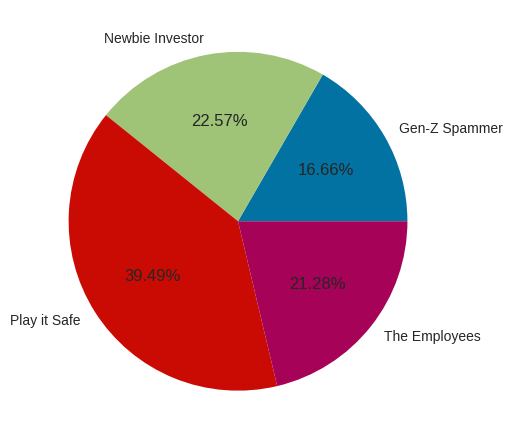

In [ ]:
df_result.loc[df_result['cluster']==0,'cluster_name']= 'Gen-Z Spammer'
df_result.loc[df_result['cluster']==1,'cluster_name']= 'The Employees'
df_result.loc[df_result['cluster']==2,'cluster_name']= 'Play it Safe'
df_result.loc[df_result['cluster']==3,'cluster_name']= 'Newbie Investor'


pie_cluster1 =df_result.groupby('cluster_name').agg({'user_id':pd.Series.nunique})
pie_cluster= pie_cluster1.reset_index()   #Reset the index to make it into a pandas dataframe

plt.pie(pie_cluster['user_id'],
        labels = pie_cluster['cluster_name'],
        autopct='%.2f%%') #Create a pie chart, autopct='%.2f%%' to show percent and 2 decimal
plt.show()


## **Recommendations**

Government bond investment have the same product character as the pendapatan tetap (Bond)  mutual fund. Therefore, to expand into government bond investment products, we can create a campaign by offering promos to the segment that likes pendapatan tetap  mutual fund products.
<br>
I would say all segment beside **Pendapatan Tetap Bond Lover** are the most likely to buy new product (government bond). Therefore, focusing the campaign on the three segments, which make up about 63%, would be more effective

.
